**Introduction to CNN**
- ConvNet
- Max Pooling
- Fully Connected Layer
- Softmax


In [ ]:
##importing required libraries
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
get_ipython().magic('matplotlib inline')
np.random.seed(1)
import cv2
import numpy as np
import os
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Input
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
##printing version of tensorflow
print(tf.__version__)

2.17.0


## Read data and converting pandas dataframe into images array

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_path="/content/gdrive/My Drive/Colab Notebooks/Deep Learning/Task 2/train.csv"
test_path="/content/gdrive/My Drive/Colab Notebooks/Deep Learning/Task 2/test.csv"
train = pd.read_csv(train_path)
print(train.shape)
print(train.head())
test= pd.read_csv(test_path)
print(test.shape)
print(test.head())


(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0      

In [ ]:
# put labels into y_train variable
y_orig1 = train["label"]
# Drop 'label' column
X_orig2 = train.drop(labels = ["label"],axis = 1,inplace=False)
X_orig2

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-5-c9b2e9e5183d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(random_samples, palette="icefire")


,count
label,
4,4
8,2
1,1
5,1
2,1
0,1


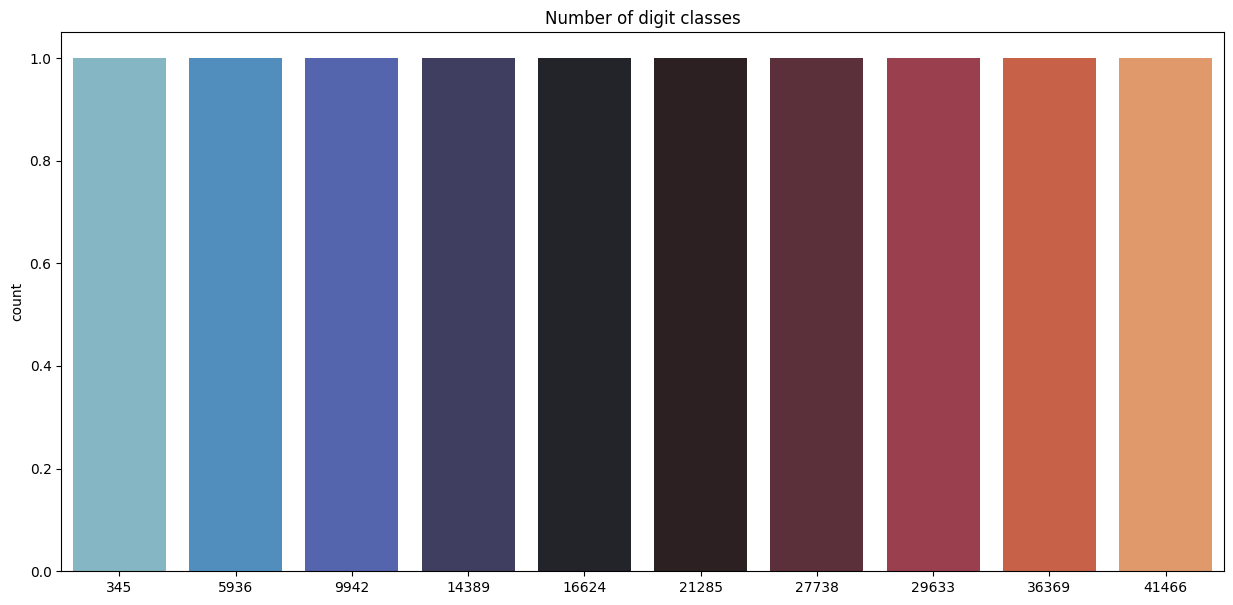

In [ ]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
random_samples = y_orig1.sample(10)
g = sns.countplot(random_samples, palette="icefire")
plt.title("Number of digit classes")
random_samples.value_counts()

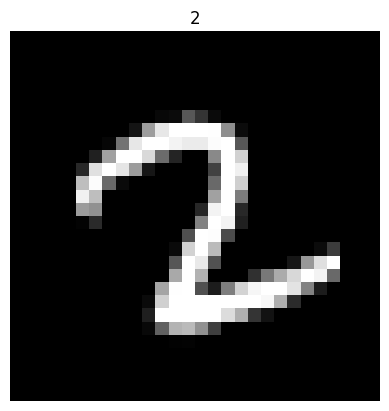

In [ ]:
# Example of a picture
index = 1020
img = X_orig2.iloc[index].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_orig1[index])
plt.axis("off")
plt.show()

## Normaliation, Reshape and Label Encoding
- Normalization
  - We perform a grayscale normalization to reduce the effect of illumination's differences.
  - If we perform normalization, CNN works faster.
- Reshape
  - Train and test images (28 x 28)
  - We reshape all data to 28x28x1 3D matrices.
  - Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
- Label Encoding
  - Encode labels to one hot vectors
    - 2 => [0,0,1,0,0,0,0,0,0,0]
    - 4 => [0,0,0,0,1,0,0,0,0,0]

In [ ]:
# Normalize the data
X_orig1 = X_orig2 / 255.0
X_orig1_test = test / 255.0
print("x_orig1 shape: ",X_orig1.shape)
print("x_orig1_test shape: ",X_orig1_test.shape)

# Reshape
X_orig = X_orig1.values.reshape(-1,28,28,1)
X_orig_test = X_orig1_test.values.reshape(-1,28,28,1)
print("x_orig shape: ",X_orig.shape)
print("x_orig_test shape: ",X_orig_test.shape)

# Label Encoding
from keras.utils import to_categorical
print("old y_orig1 shape: ", y_orig1.shape)
y_orig = to_categorical(y_orig1, num_classes = 10)
print("y_orig shape: ",y_orig.shape)



x_orig1 shape:  (42000, 784)
x_orig1_test shape:  (28000, 784)
x_orig shape:  (42000, 28, 28, 1)
x_orig_test shape:  (28000, 28, 28, 1)
old y_orig1 shape:  (42000,)
y_orig shape:  (42000, 10)


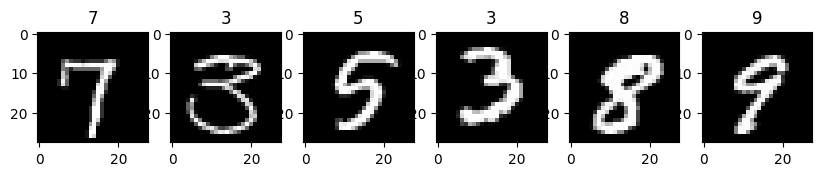

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(10, 6))

for _ax, sample, label in zip(ax, X_orig[6:12], y_orig1[6:12]):
    img = sample
    _ax.imshow(img,cmap='gray')
    _ax.set_title(label)

## Train Test split
- We split the data into train and test sets.
- test size is 20%.
- train size is 80%.


In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_orig, y_orig, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("Y_test shape",Y_test.shape)

x_train shape (37800, 28, 28, 1)
X_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
Y_test shape (4200, 10)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


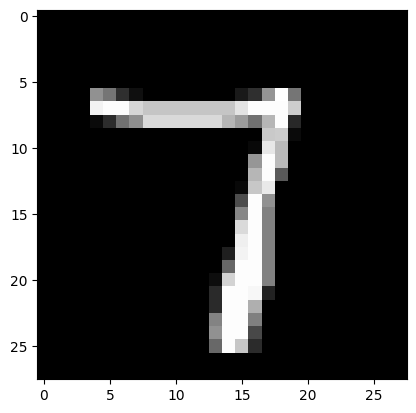

In [ ]:
# Some examples
index=1
print(Y_train[index])
plt.imshow(X_train[index][:,:,0],cmap='gray')
plt.show()


## Model -  Convolutional Neural Network

### Convoluation Operation
- We have some image and feature detector(3*3)
- Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
- Feature detector = kernel = filter
- Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
- feature map = conv(input image, feature detector). Element wise multiplication of matrices.
- feature map = convolved feature
- Stride = navigating in input image.
- We reduce the size of image by setting the value of stride more than 1. This is important because code runs faster but we loose information.
- We create multiple feature maps because we use multiple feature detectors(filters).
- After having convolution layer we use ReLU to break up linearity.
- **tf.nn.conv2d(X,W, strides = [1,s,s,1], padding = 'SAME'):** given an input $X$ and a group of filters $W$, this function convolves $W$'s filters on X. The third parameter ([1,s,s,1]) represents the strides for each dimension of the input (m, n_H_prev, n_W_prev, n_C_prev). Normally, you'll choose a stride of 1 for the number of examples (the first value) and for the channels (the fourth value), which is why we wrote the value as `[1,s,s,1]`. You can read the full documentation on [conv2d](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

![picture](https://miro.medium.com/max/1462/1*ROh_38pysewuh6fVPQpxFQ.png)


### Same Padding
- As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
- input size and output size are same.

![picture](https://miro.medium.com/max/666/1*noYcUAa_P8nRilg3Lt_nuA.png)


### Max Pooling
- It makes down-sampling or sub-sampling (Reduces the number of parameters)
- It makes the detection of features invariant to scale or orientation changes.
- It reduce the amount of parameters and computation in the network, and hence to also control overfitting.
- **tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2), strides=None,padding='valid', data_format=None)** given an input A, this function uses a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window.  For max pooling, we usually operate on a single example at a time and a single channel at a time.  So the first and fourth value in `[1,f,f,1]` are both 1.  You can read the full documentation on [max_pool](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool3D).

![picture](https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png)


### Flattening
- For example, given a tensor with dimensions [100,2,3,4], it flattens the tensor to be of shape [100, 24], where 24 = 2 * 3 * 4.  You can read the full documentation on [flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten).

![picture](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_2.png)


### Fully Connected(FC)/Dense
- Neurons in a fully connected layer have connections to all activations in the previous layer
- Artificial Neural Network
- **tf.keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',bias_initializer='zeros',kernel_regularizer=None, bias_regularizer=None,activity_regularizer=None,kernel_constraint=None, bias_constraint=None:**
- given the flattened input,F, it returns the output computed using a fully connected layer. You can read the full documentation on [fully_connected](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

![picture](https://static.packt-cdn.com/products/9781788996242/graphics/451a22fa-7568-4602-a522-e2dd3826e53e.png)


### Using Keras
- Implement the `forward_propagation` function below to build the following model: `CONV2D -> MAXPOOL -> CONV2D -> MAXPOOL -> FLATTEN -> FULLYCONNECTED -> FULLYCONNECTED`. You should use the functions above.

# New model

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Input
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

results = []

# Define the custom convolutional layer
class MyConvLayer(tf.keras.layers.Layer):
    def __init__(self, filters: int, kernel_size: tuple, use_max_pool: bool = True):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='Same', activation='relu')
        self.max_pool = tf.keras.layers.MaxPool2D((2, 2)) if use_max_pool else None

    def call(self, inputs):
        x = self.conv1(inputs)
        if self.max_pool:
            x = self.max_pool(x)
        return x

# Define the CNN model class with hyperparameter options
class ModelWithTuning(tf.keras.Model):
    def __init__(self, filters, kernel_size, use_max_pool, dense_units):
        super(ModelWithTuning, self).__init__()
        self.my_layers = tf.keras.models.Sequential([
            MyConvLayer(filters=f, kernel_size=ks, use_max_pool=ump)
            for f, ks, ump in zip(filters, kernel_size, use_max_pool)
        ])
        self.flatten = Flatten()
        self.fc1 = Dense(dense_units, activation='relu')
        self.fc2 = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.my_layers(inputs)
        x = self.flatten(x)
        x = self.fc1(x)
        return self.fc2(x)

def build_model(filters, kernel_size, use_max_pool, dense_units, optimizer):
    model = ModelWithTuning(filters, kernel_size, use_max_pool, dense_units)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def plot_visualization(history):
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def compare_optimazer_plot(results: dict, columns: str):
  df = pd.DataFrame(results).T.reset_index().rename(columns={'index':  columns})
  df_melted = df.melt(id_vars=[columns],
  value_vars=['loss','val_loss'],
  var_name='Metric', value_name='Value')
  plt.figure(figsize=(14, 7))
  sns.barplot(x=columns, y='Value', hue='Metric', data=df_melted)
  plt.title('Comparison of Loss and Validation Loss')
  plt.ylabel('Value')
  plt.xlabel(columns)
  plt.legend(title='Metric')
  df_melted = df.melt(id_vars=[columns], value_vars=['accuracy'],
  var_name='Metric', value_name='Value')
  plt.figure(figsize=(14, 7))
  sns.barplot(x=columns, y='Value', hue='Metric', data=df_melted)
  plt.title('Comparison of accuracy')
  plt.ylabel('Value')
  plt.xlabel(columns)
  plt.legend(title='Metric')
  plt.show()

def calculate_metrics(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)

    precision = precision_score(Y_true, Y_pred_classes, average='weighted')
    recall = recall_score(Y_true, Y_pred_classes, average='weighted')
    f1 = f1_score(Y_true, Y_pred_classes, average='weighted')

    return precision, recall, f1

def confusion_matrix_visualization(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    Y_pred_classes = np.argmax(Y_pred, axis=1)
    Y_true = np.argmax(Y_test, axis=1)

    confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def manual_hyperparameter_tuning(train_X, train_Y, X_test, Y_test, filters_list, kernel_sizes, dense_units_list, optimizers):
    for filters in filters_list:
        for kernel_size in kernel_sizes:
            for dense_units in dense_units_list:
                for optimizer in optimizers:
                    print(f"Training with filters: {filters}, kernel_size: {kernel_size}, dense_units: {dense_units}, optimizer: {optimizer}")
                    optimizers_results = {}
                    model = build_model(filters, kernel_size, [True]*(len(filters)-1) + [False], dense_units, optimizer)

                    early_stopping_monitor = EarlyStopping(patience=3)
                    epochs=10
                    history = model.fit(
                        train_X, train_Y, validation_split=0.2, epochs=epochs, batch_size=64,
                        callbacks=[early_stopping_monitor]
                    )
                    val_loss = history.history['val_loss'][-1]
                    plot_visualization(history)

                    test_loss, test_accuracy = model.evaluate(X_test, Y_test)
                    precision, recall, f1 = calculate_metrics(model, X_test, Y_test)
                    confusion_matrix_visualization(model, X_test, Y_test)

                    results.append([filters, kernel_size, dense_units, float(model.optimizer.learning_rate.numpy()), optimizer, epochs,
                                    test_loss, test_accuracy, precision, recall, f1])
                    optimizers_results[optimizer] = {'loss': test_loss, 'accuracy': test_accuracy, 'val_loss': val_loss}
                    print(f"Test Accuracy: {test_accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")
                    print("-" * 60)
                compare_optimazer_plot(optimizers_results, "Optimizers")

# Example usage
filters_list = [[16, 32], [32, 64]]  # Different filter combinations
kernel_sizes = [[(3, 3), (3, 3)], [(5, 5), (3, 3)]]  # Kernel sizes
dense_units_list = [64, 128]  # Dense units
optimizers = ['adam', 'sgd']  # Optimizers
optimizers_list = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']

Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 64, optimizer: adam
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8515 - loss: 0.5010 - val_accuracy: 0.9685 - val_loss: 0.0998
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9744 - loss: 0.0818 - val_accuracy: 0.9790 - val_loss: 0.0707
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0464 - val_accuracy: 0.9810 - val_loss: 0.0596
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0358 - val_accuracy: 0.9854 - val_loss: 0.0459
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0255 - val_accuracy: 0.9864 - val_loss: 0.0448
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9953 - loss: 0.0174 - val_accuracy: 0.9857 - val_loss: 0.0492
Epoch 7/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9952 - loss: 0.0157 - val_accuracy: 0.9869 - val_loss: 0.0498
Epoch 8

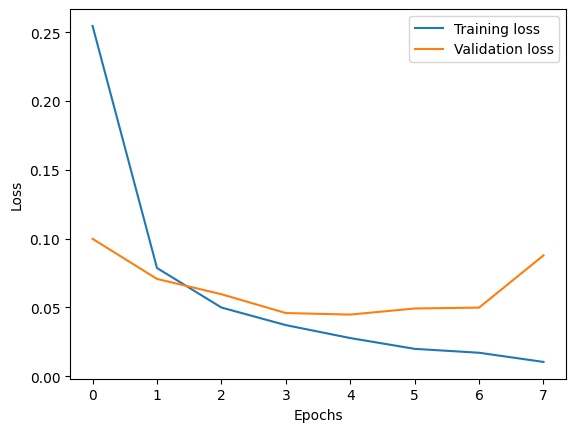

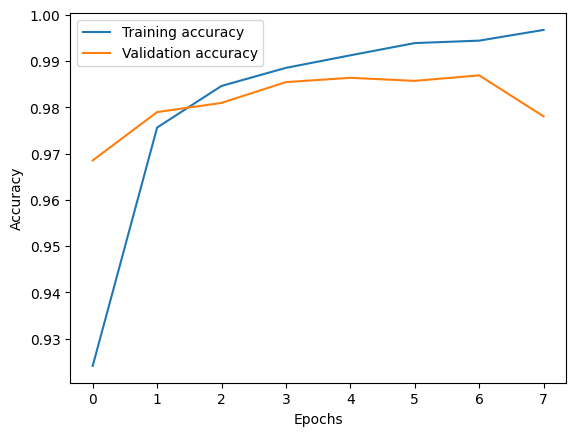

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9774 - loss: 0.0794
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


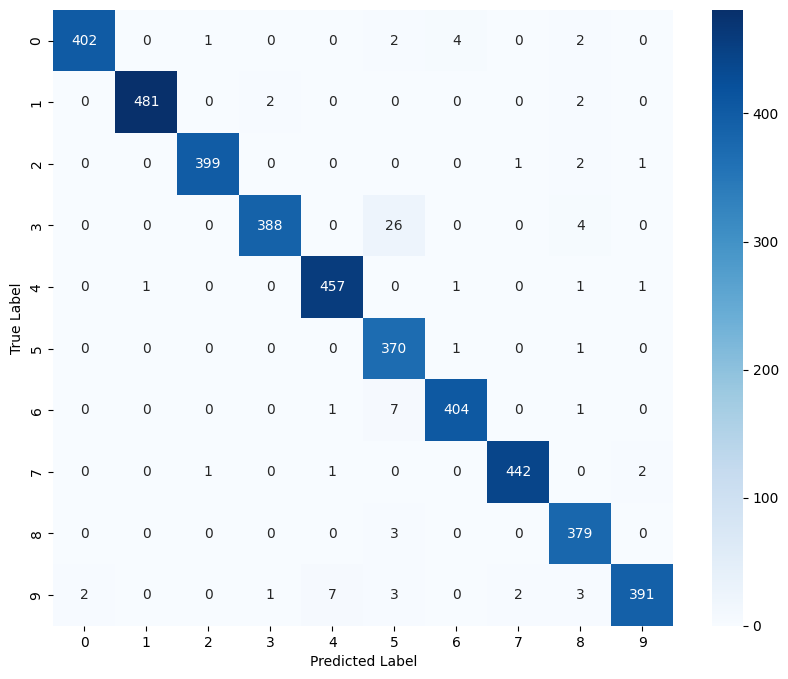

Test Accuracy: 0.979285717010498, Precision: 0.9802531499684842, Recall: 0.9792857142857143, F1 Score: 0.9793878423821696
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 64, optimizer: sgd
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5253 - loss: 1.5424 - val_accuracy: 0.8376 - val_loss: 0.4866
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8981 - loss: 0.3419 - val_accuracy: 0.9269 - val_loss: 0.2422
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9245 - loss: 0.2525 - val_accuracy: 0.9139 - val_loss: 0.2789
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9341 - loss: 0.2207 - val_accuracy: 0.9319 - val_loss: 0.2203
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9439 - loss: 0.1862 - val_accuracy: 0.9528 - val_loss: 0.1579
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9502 - loss: 0.

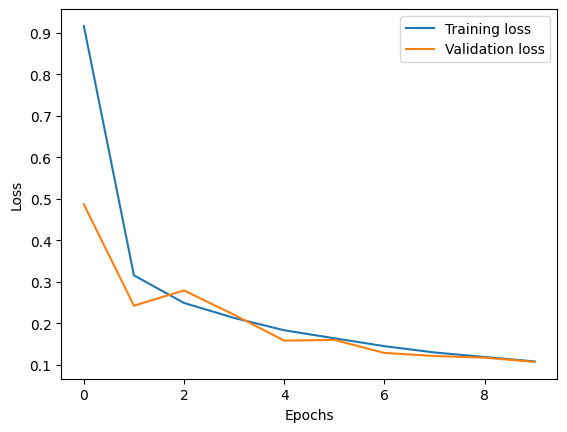

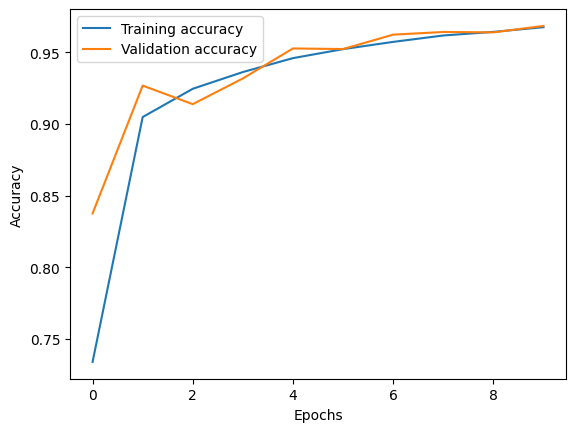

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1215
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


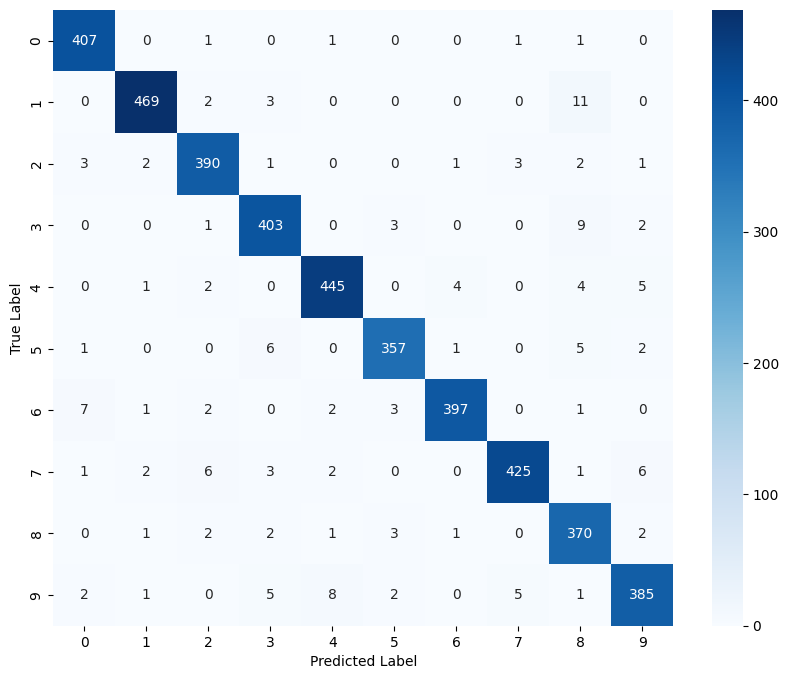

Test Accuracy: 0.9638095498085022, Precision: 0.9642112645739258, Recall: 0.9638095238095238, F1 Score: 0.963872309359411
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 64, optimizer: rmsprop
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8336 - loss: 0.5311 - val_accuracy: 0.9721 - val_loss: 0.0900
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.0768 - val_accuracy: 0.9829 - val_loss: 0.0549
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9863 - loss: 0.0463 - val_accuracy: 0.9870 - val_loss: 0.0473
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9913 - loss: 0.0283 - val_accuracy: 0.9869 - val_loss: 0.0411
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.0203 - val_accuracy: 0.9893 - val_loss: 0.0412
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9954 - loss

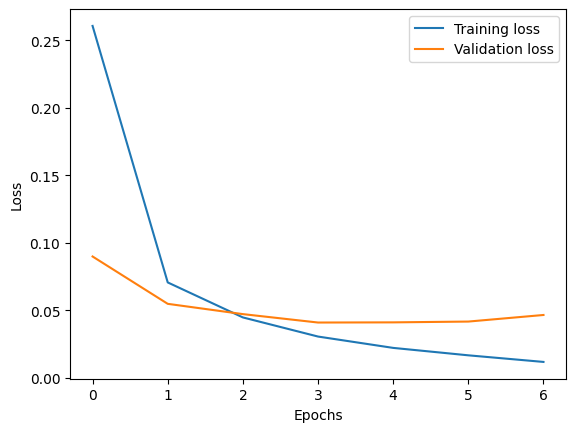

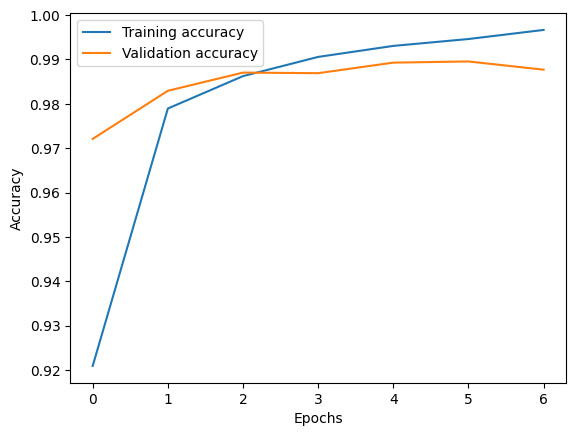

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9849 - loss: 0.0493
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


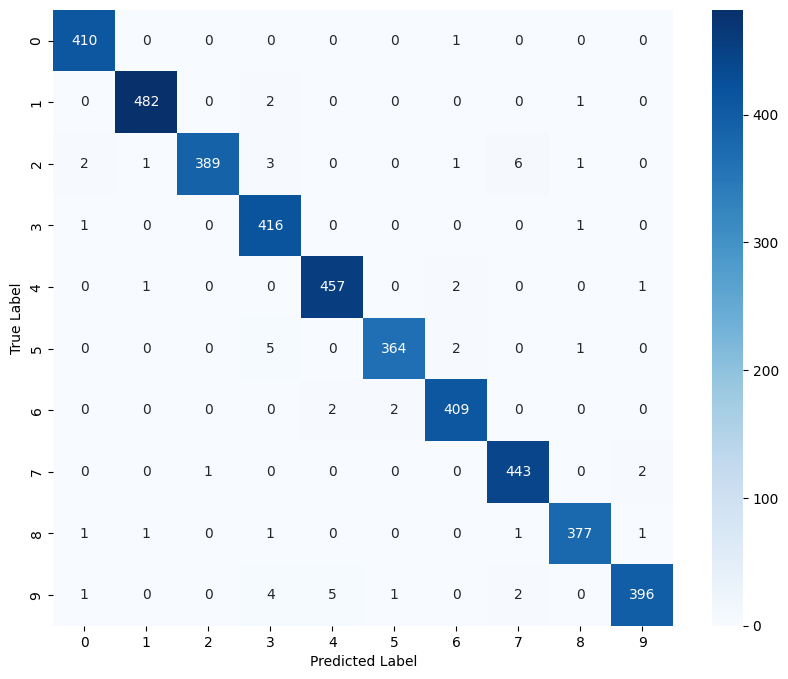

Test Accuracy: 0.9864285588264465, Precision: 0.986552278171492, Recall: 0.9864285714285714, F1 Score: 0.9864176340376686
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 64, optimizer: adagrad
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2851 - loss: 2.2102 - val_accuracy: 0.7524 - val_loss: 1.5343
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7688 - loss: 1.2158 - val_accuracy: 0.8522 - val_loss: 0.6266
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8514 - loss: 0.5719 - val_accuracy: 0.8807 - val_loss: 0.4499
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8742 - loss: 0.4490 - val_accuracy: 0.8890 - val_loss: 0.3939
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8870 - loss: 0.3855 - val_accuracy: 0.8981 - val_loss: 0.3578
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8920 - loss

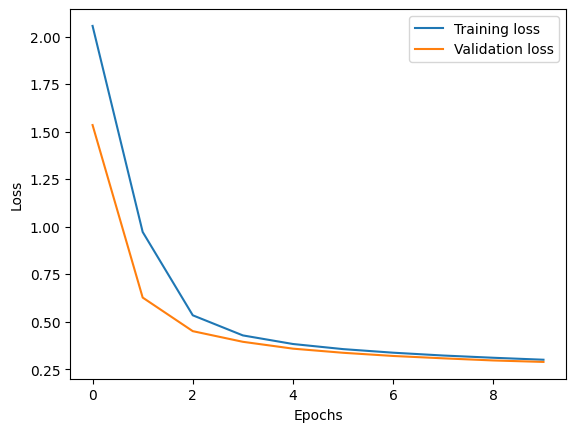

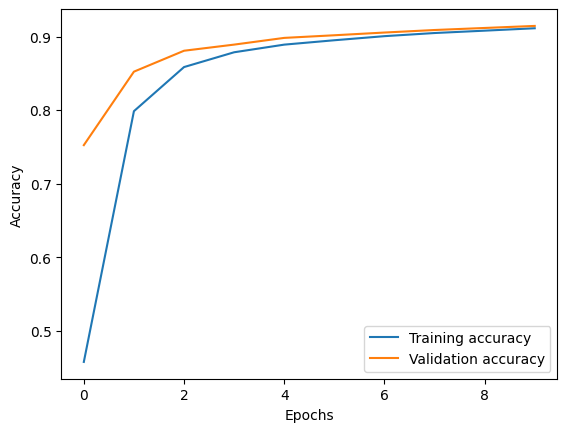

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9172 - loss: 0.2944
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


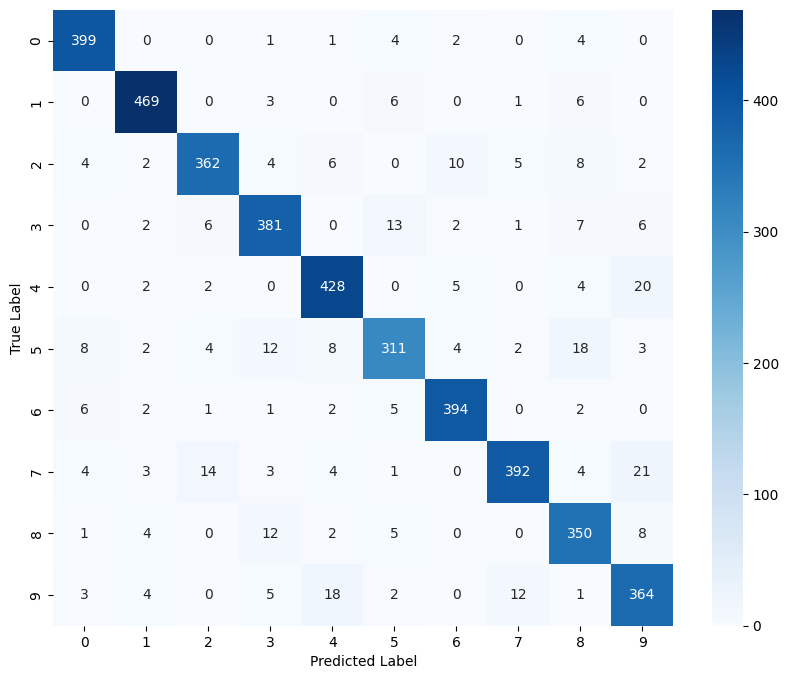

Test Accuracy: 0.9166666865348816, Precision: 0.917190298308817, Recall: 0.9166666666666666, F1 Score: 0.9165331390673639
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 64, optimizer: adadelta
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1498 - loss: 2.2779 - val_accuracy: 0.2901 - val_loss: 2.2393
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3463 - loss: 2.2255 - val_accuracy: 0.4708 - val_loss: 2.1804
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4927 - loss: 2.1646 - val_accuracy: 0.5659 - val_loss: 2.1096
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5768 - loss: 2.0900 - val_accuracy: 0.6311 - val_loss: 2.0212
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6313 - loss: 1.9978 - val_accuracy: 0.6656 - val_loss: 1.9134
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6655 - los

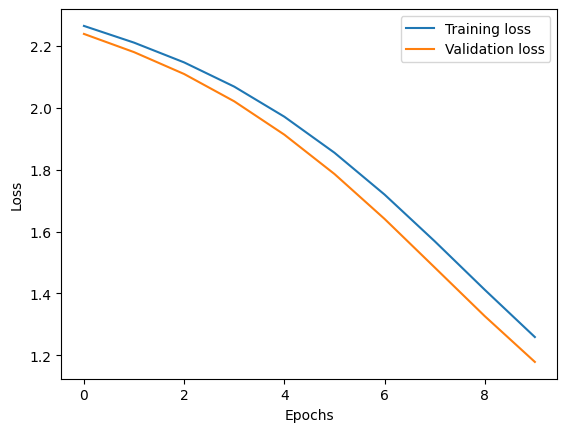

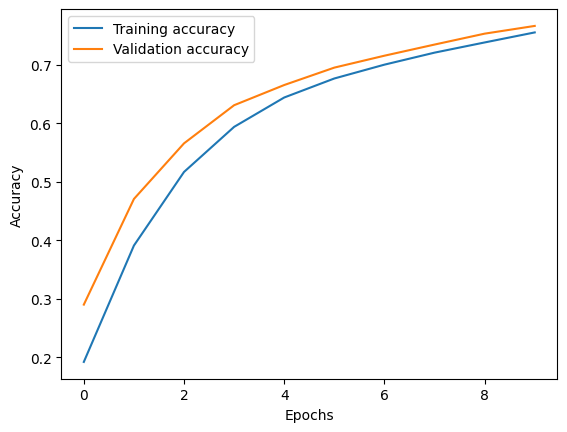

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7632 - loss: 1.1970
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


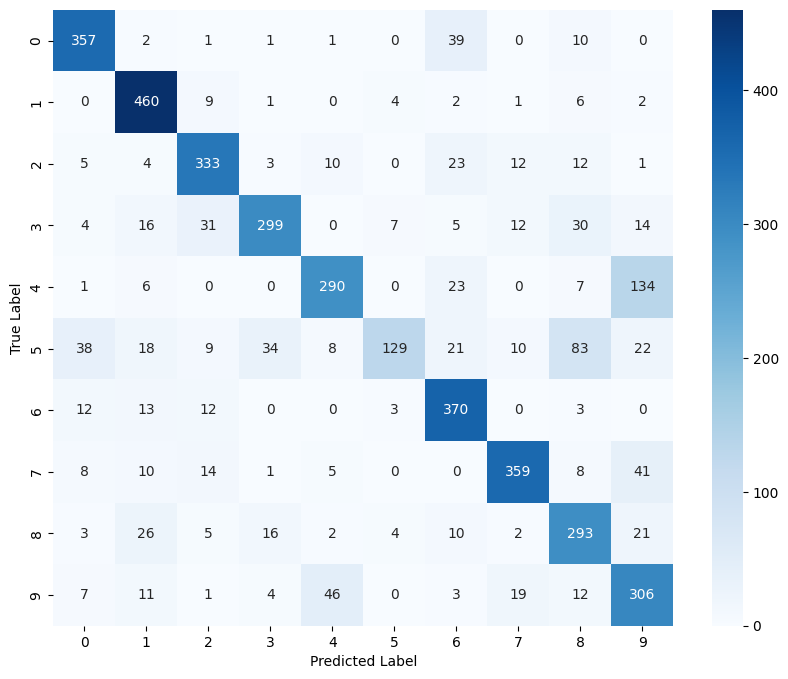

Test Accuracy: 0.760952353477478, Precision: 0.7774289110704797, Recall: 0.7609523809523809, F1 Score: 0.7541125203906913
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 64, optimizer: adamax
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8079 - loss: 0.6858 - val_accuracy: 0.9483 - val_loss: 0.1670
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9548 - loss: 0.1593 - val_accuracy: 0.9694 - val_loss: 0.1020
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9734 - loss: 0.0916 - val_accuracy: 0.9776 - val_loss: 0.0769
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9788 - loss: 0.0684 - val_accuracy: 0.9816 - val_loss: 0.0612
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9820 - loss: 0.0582 - val_accuracy: 0.9824 - val_loss: 0.0592
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9869 - loss:

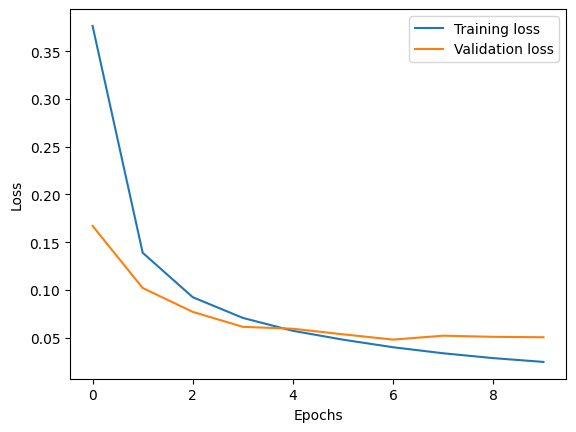

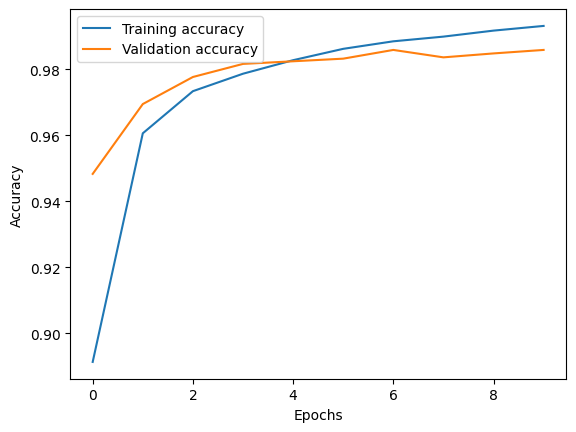

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9839 - loss: 0.0621
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


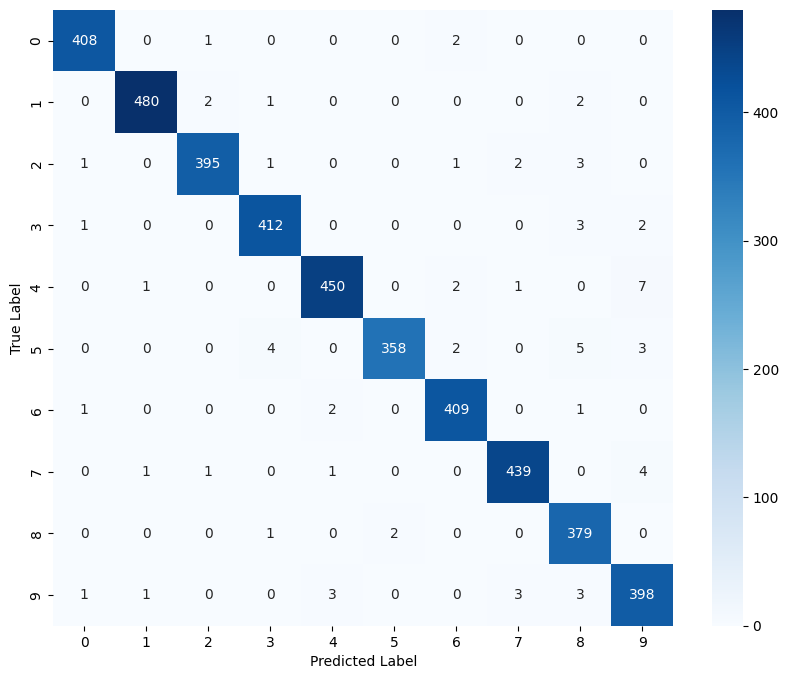

Test Accuracy: 0.9828571677207947, Precision: 0.9830173049689767, Recall: 0.9828571428571429, F1 Score: 0.9828740258361228
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 64, optimizer: nadam
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8409 - loss: 0.5389 - val_accuracy: 0.9741 - val_loss: 0.0890
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9766 - loss: 0.0819 - val_accuracy: 0.9813 - val_loss: 0.0603
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9854 - loss: 0.0486 - val_accuracy: 0.9837 - val_loss: 0.0486
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9892 - loss: 0.0332 - val_accuracy: 0.9853 - val_loss: 0.0478
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9922 - loss: 0.0238 - val_accuracy: 0.9866 - val_loss: 0.0448
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9940 - loss:

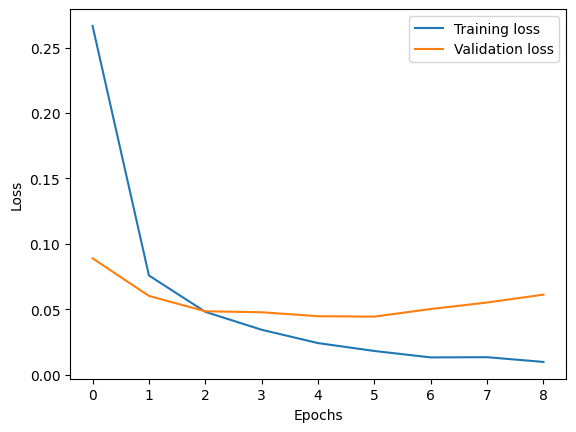

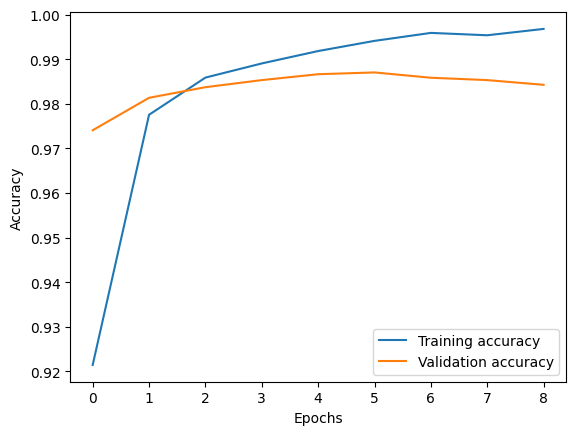

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9855 - loss: 0.0651
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


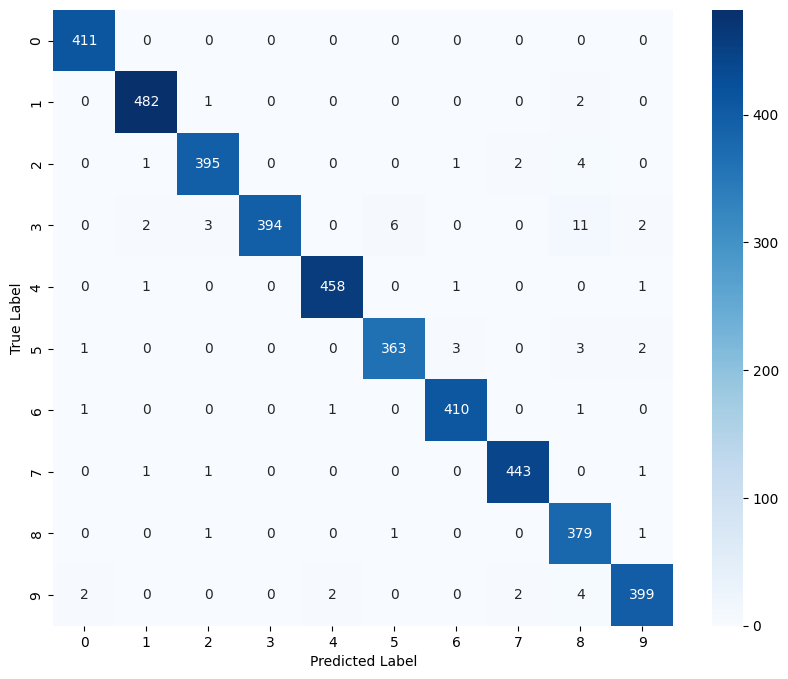

Test Accuracy: 0.9842857122421265, Precision: 0.9846033409535684, Recall: 0.9842857142857143, F1 Score: 0.984285335707989
------------------------------------------------------------


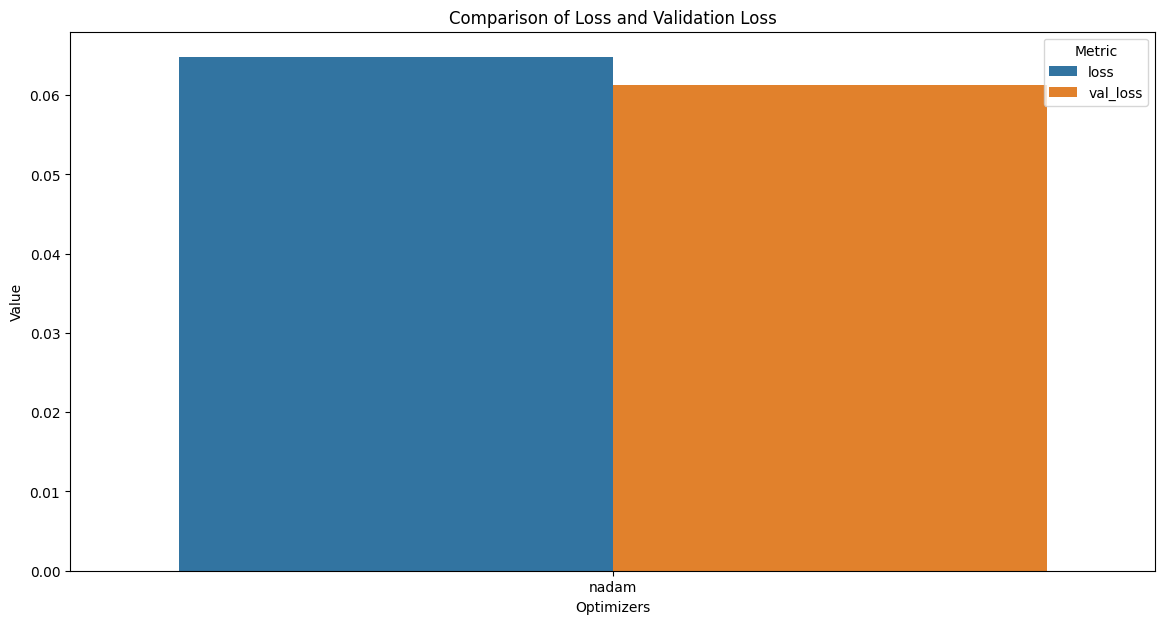

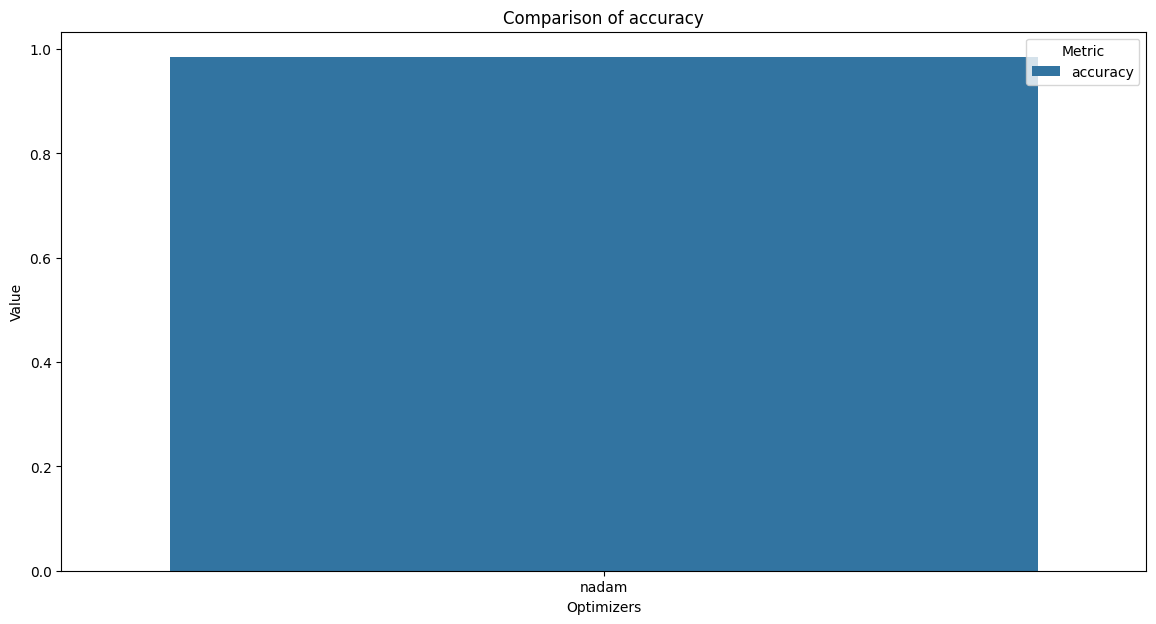

Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 128, optimizer: adam
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8611 - loss: 0.4705 - val_accuracy: 0.9780 - val_loss: 0.0691
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9793 - loss: 0.0652 - val_accuracy: 0.9844 - val_loss: 0.0545
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9895 - loss: 0.0352 - val_accuracy: 0.9861 - val_loss: 0.0450
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9926 - loss: 0.0233 - val_accuracy: 0.9856 - val_loss: 0.0479
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9944 - loss: 0.0172 - val_accuracy: 0.9876 - val_loss: 0.0443
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9962 - loss: 0.0111 - val_accuracy: 0.9873 - val_loss: 0.0462
Epoch 7/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9975 - loss: 0.0084 - val_accuracy: 0.9857 - val_loss: 0.0556
Epoch 

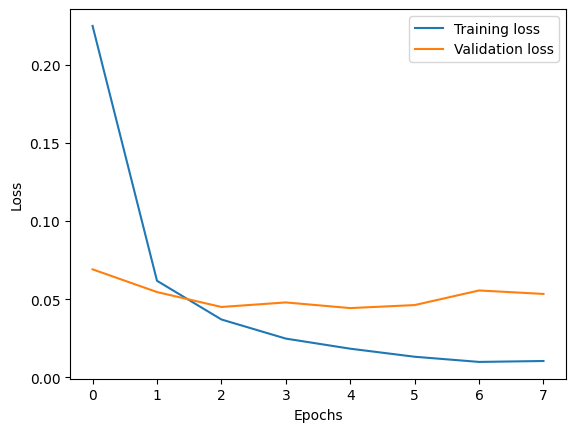

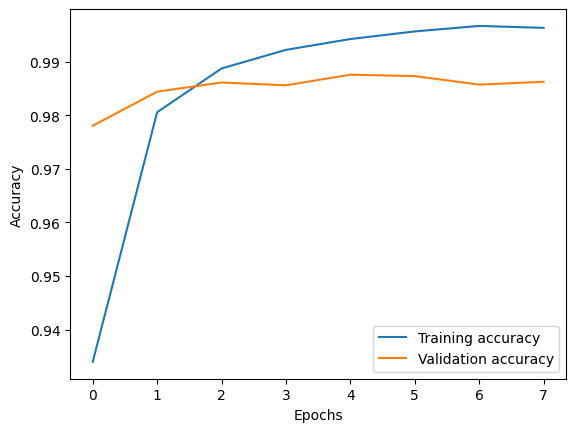

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0484
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


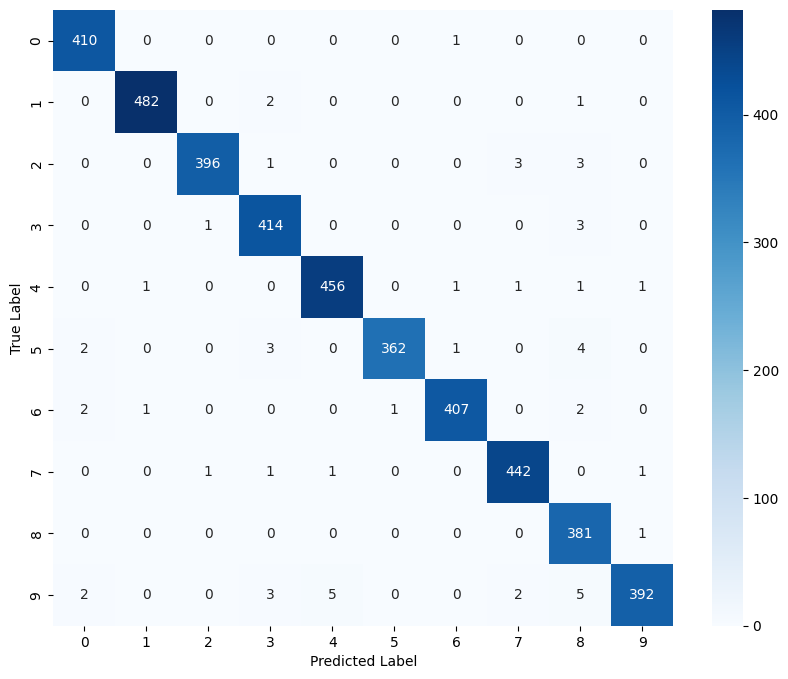

Test Accuracy: 0.9861904978752136, Precision: 0.9864109680867711, Recall: 0.9861904761904762, F1 Score: 0.9861975752468022
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 128, optimizer: sgd
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5892 - loss: 1.4408 - val_accuracy: 0.8845 - val_loss: 0.3756
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9041 - loss: 0.3193 - val_accuracy: 0.9146 - val_loss: 0.2737
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9249 - loss: 0.2500 - val_accuracy: 0.9398 - val_loss: 0.1985
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9355 - loss: 0.2125 - val_accuracy: 0.9451 - val_loss: 0.1833
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9448 - loss: 0.1832 - val_accuracy: 0.9484 - val_loss: 0.1660
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9553 - loss: 

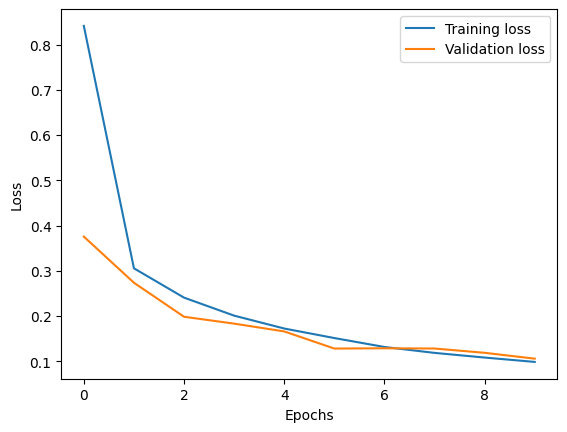

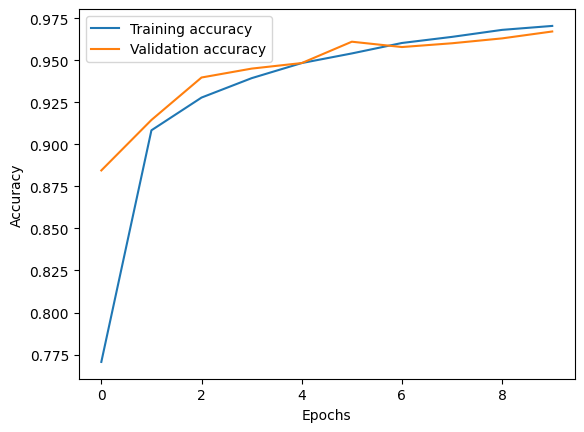

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9617 - loss: 0.1197
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


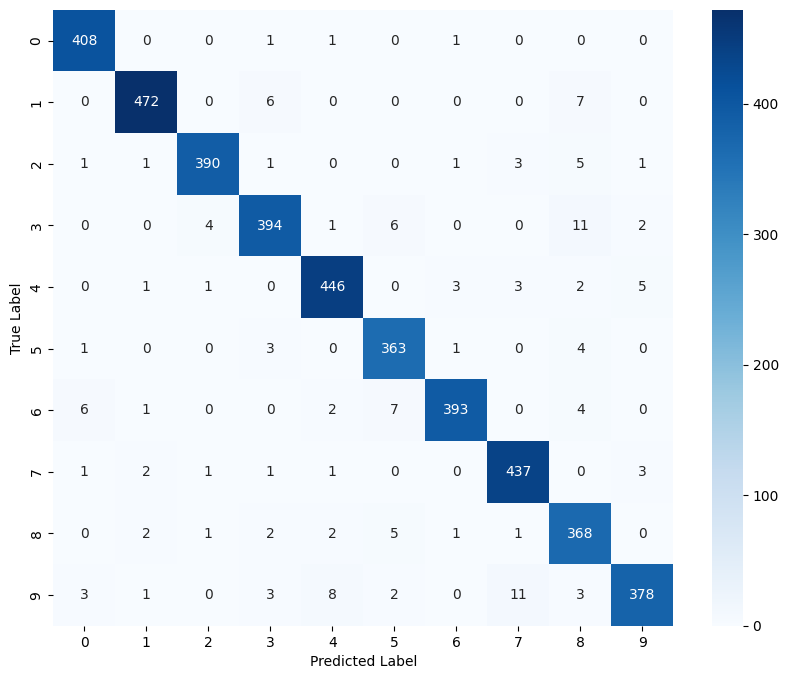

Test Accuracy: 0.9640476107597351, Precision: 0.9644943519497831, Recall: 0.964047619047619, F1 Score: 0.9640672367177795
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 128, optimizer: rmsprop
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8561 - loss: 0.4546 - val_accuracy: 0.9721 - val_loss: 0.0905
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9781 - loss: 0.0703 - val_accuracy: 0.9832 - val_loss: 0.0520
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9861 - loss: 0.0431 - val_accuracy: 0.9806 - val_loss: 0.0627
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9905 - loss: 0.0269 - val_accuracy: 0.9821 - val_loss: 0.0694
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9941 - loss: 0.0179 - val_accuracy: 0.9857 - val_loss: 0.0526


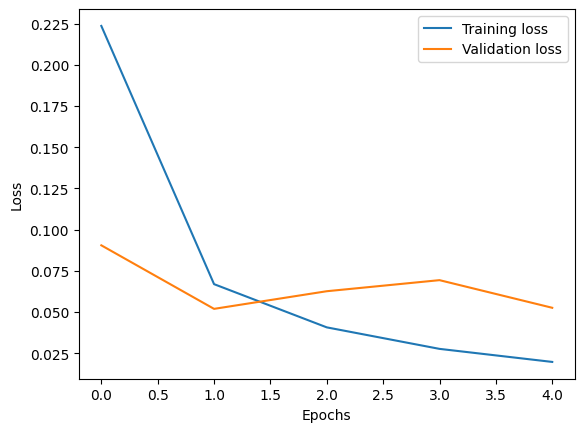

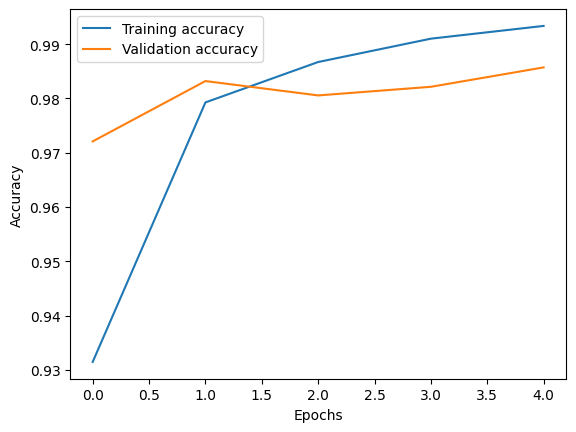

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - loss: 0.0696
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


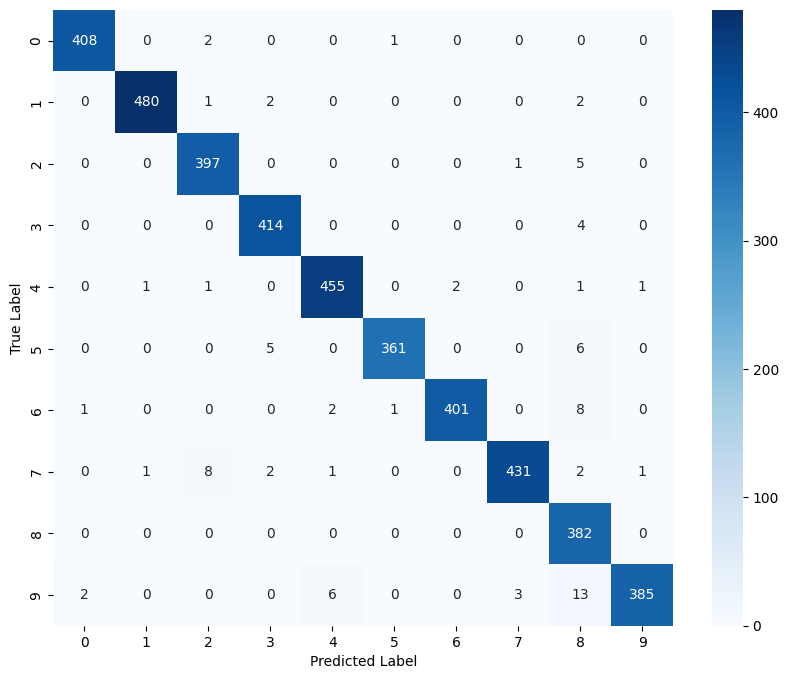

Test Accuracy: 0.9795238375663757, Precision: 0.9804733570972948, Recall: 0.9795238095238096, F1 Score: 0.97964748201656
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 128, optimizer: adagrad
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3246 - loss: 2.2020 - val_accuracy: 0.7565 - val_loss: 1.3161
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7884 - loss: 1.0087 - val_accuracy: 0.8594 - val_loss: 0.5438
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8593 - loss: 0.5135 - val_accuracy: 0.8853 - val_loss: 0.4156
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8832 - loss: 0.4101 - val_accuracy: 0.8995 - val_loss: 0.3596
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8929 - loss: 0.3630 - val_accuracy: 0.9028 - val_loss: 0.3289
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9042 - loss

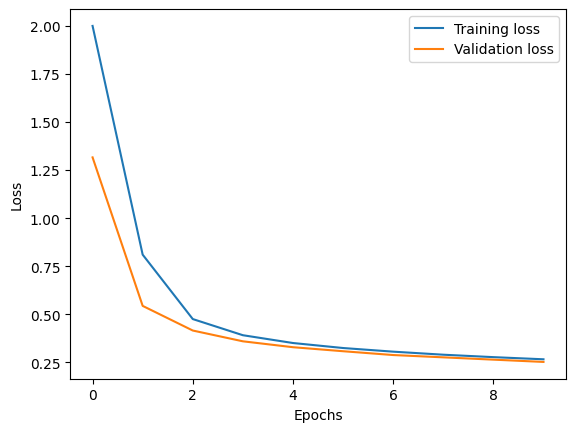

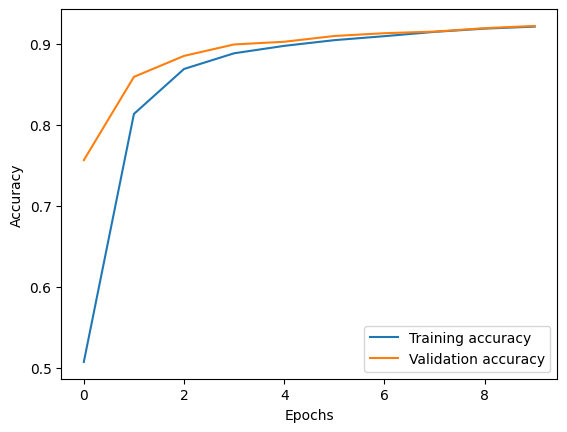

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9260 - loss: 0.2550
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


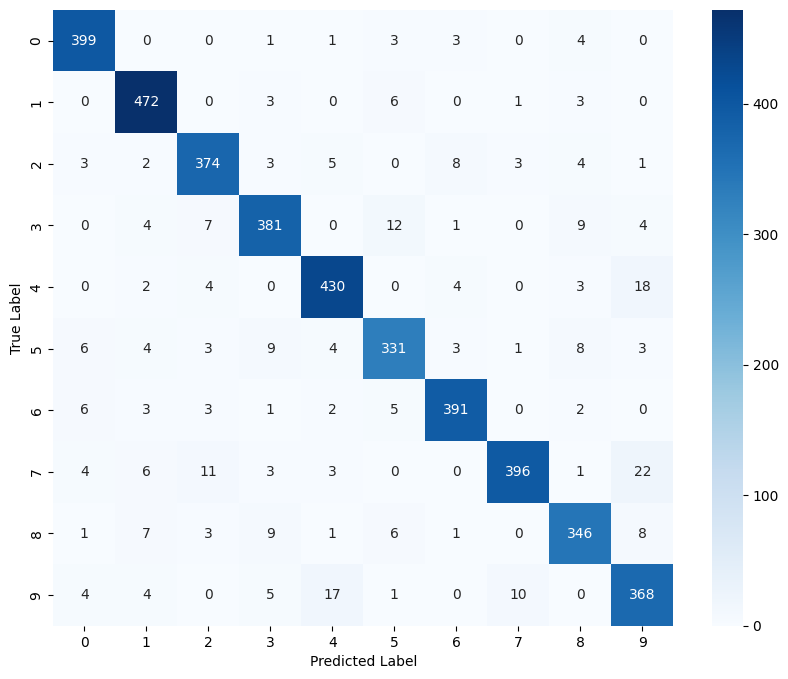

Test Accuracy: 0.9257143139839172, Precision: 0.9261045872075101, Recall: 0.9257142857142857, F1 Score: 0.9256447510591009
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 128, optimizer: adadelta
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1222 - loss: 2.2781 - val_accuracy: 0.2981 - val_loss: 2.2186
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3552 - loss: 2.1981 - val_accuracy: 0.4963 - val_loss: 2.1258
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5112 - loss: 2.1016 - val_accuracy: 0.5874 - val_loss: 2.0145
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5945 - loss: 1.9858 - val_accuracy: 0.6589 - val_loss: 1.8784
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6619 - loss: 1.8461 - val_accuracy: 0.7149 - val_loss: 1.7184
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7084 - l

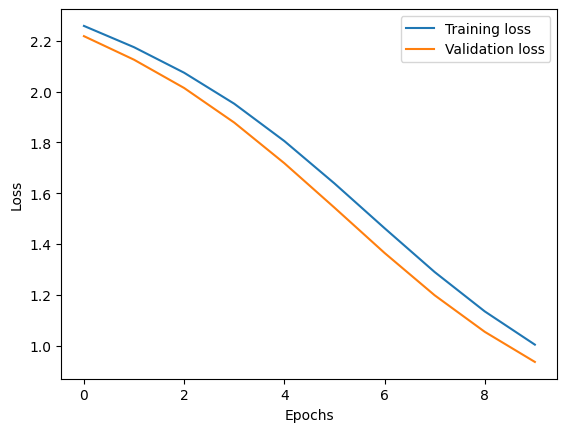

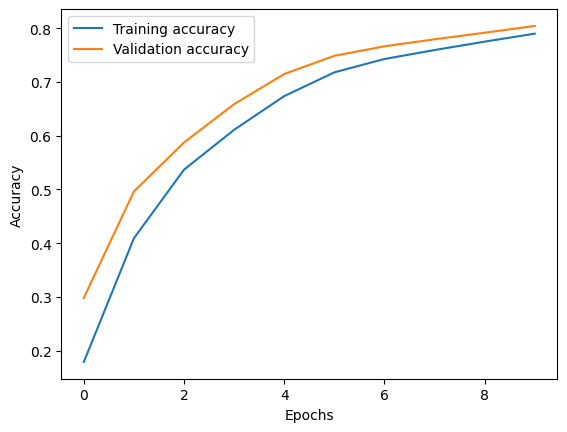

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.9527
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


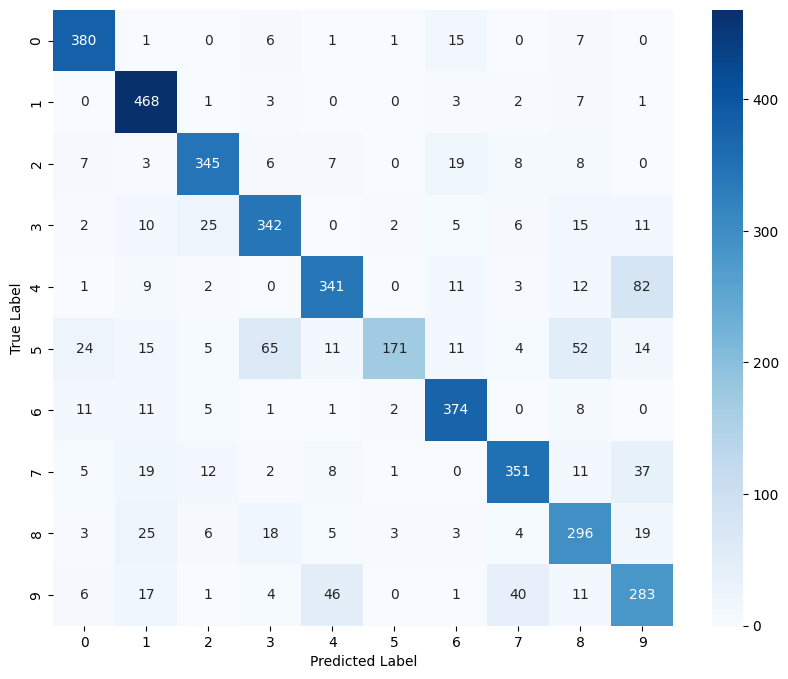

Test Accuracy: 0.7978571653366089, Precision: 0.8070336666339671, Recall: 0.7978571428571428, F1 Score: 0.7932166722718377
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 128, optimizer: adamax
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8221 - loss: 0.5935 - val_accuracy: 0.9528 - val_loss: 0.1539
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9603 - loss: 0.1311 - val_accuracy: 0.9725 - val_loss: 0.0902
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9790 - loss: 0.0741 - val_accuracy: 0.9803 - val_loss: 0.0683
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9832 - loss: 0.0578 - val_accuracy: 0.9810 - val_loss: 0.0593
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9868 - loss: 0.0464 - val_accuracy: 0.9851 - val_loss: 0.0520
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - los

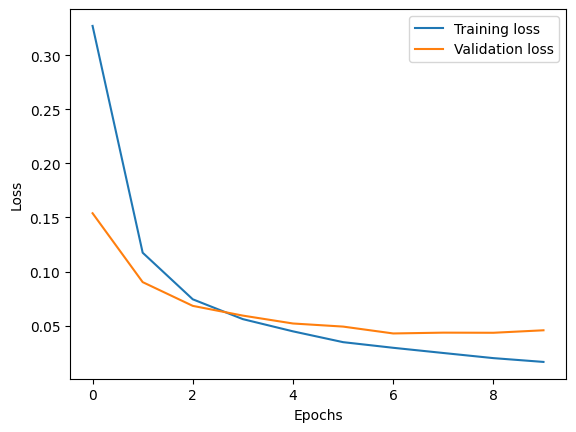

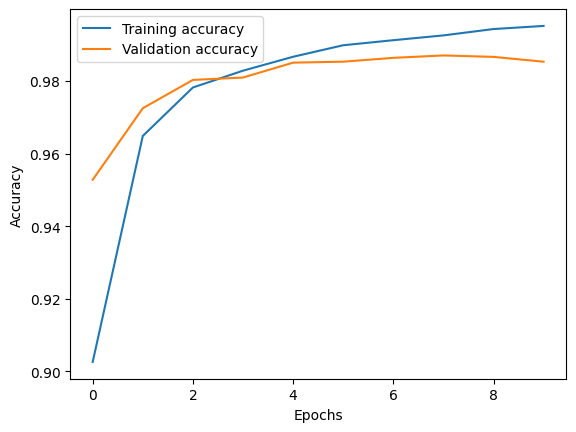

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9837 - loss: 0.0537
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


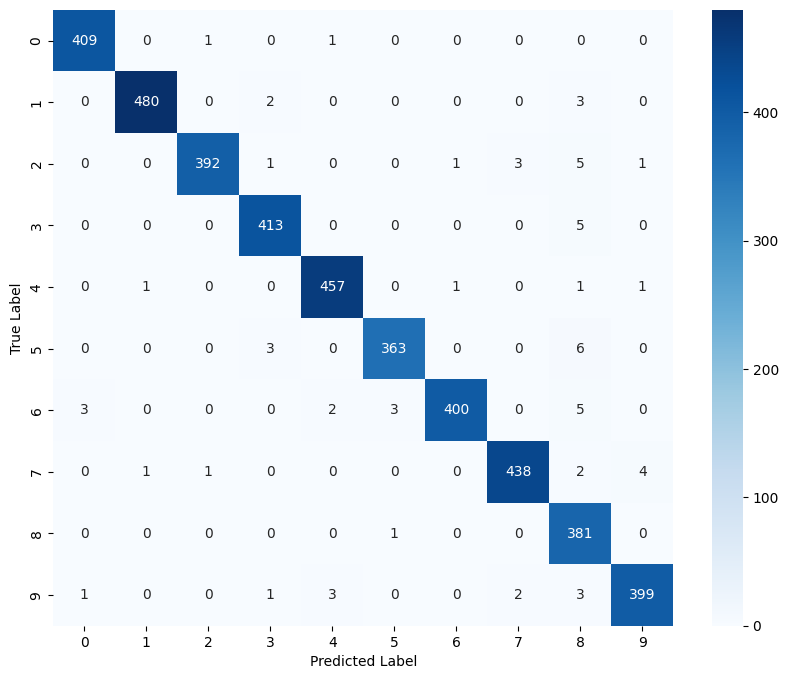

Test Accuracy: 0.9838095307350159, Precision: 0.9842702226294705, Recall: 0.9838095238095238, F1 Score: 0.9838829876099334
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(3, 3), (3, 3)], dense_units: 128, optimizer: nadam
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8696 - loss: 0.4302 - val_accuracy: 0.9762 - val_loss: 0.0739
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9789 - loss: 0.0693 - val_accuracy: 0.9835 - val_loss: 0.0552
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9873 - loss: 0.0398 - val_accuracy: 0.9860 - val_loss: 0.0489
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9821 - val_loss: 0.0564
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9951 - loss: 0.0179 - val_accuracy: 0.9831 - val_loss: 0.0598
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9946 - loss

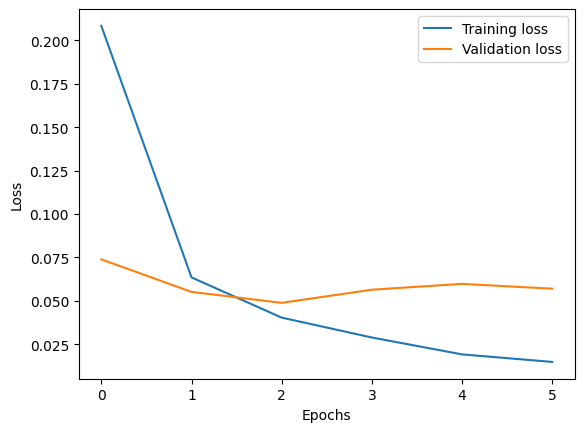

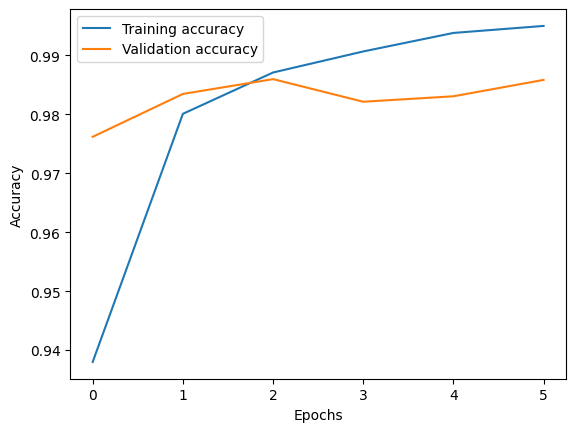

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9861 - loss: 0.0465
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


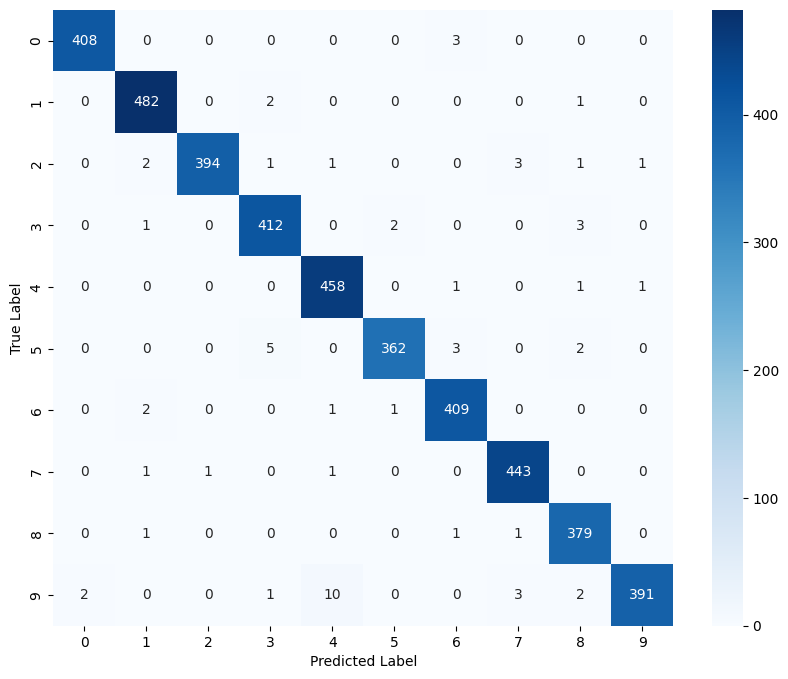

Test Accuracy: 0.9852380752563477, Precision: 0.9853695762485837, Recall: 0.9852380952380952, F1 Score: 0.9852211979503287
------------------------------------------------------------


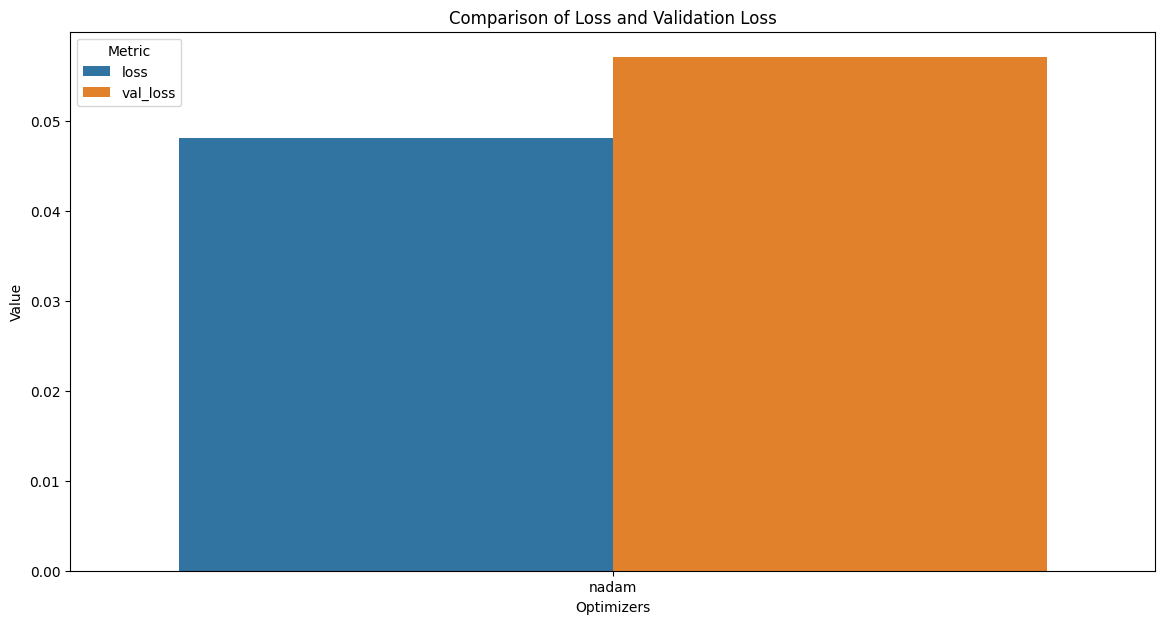

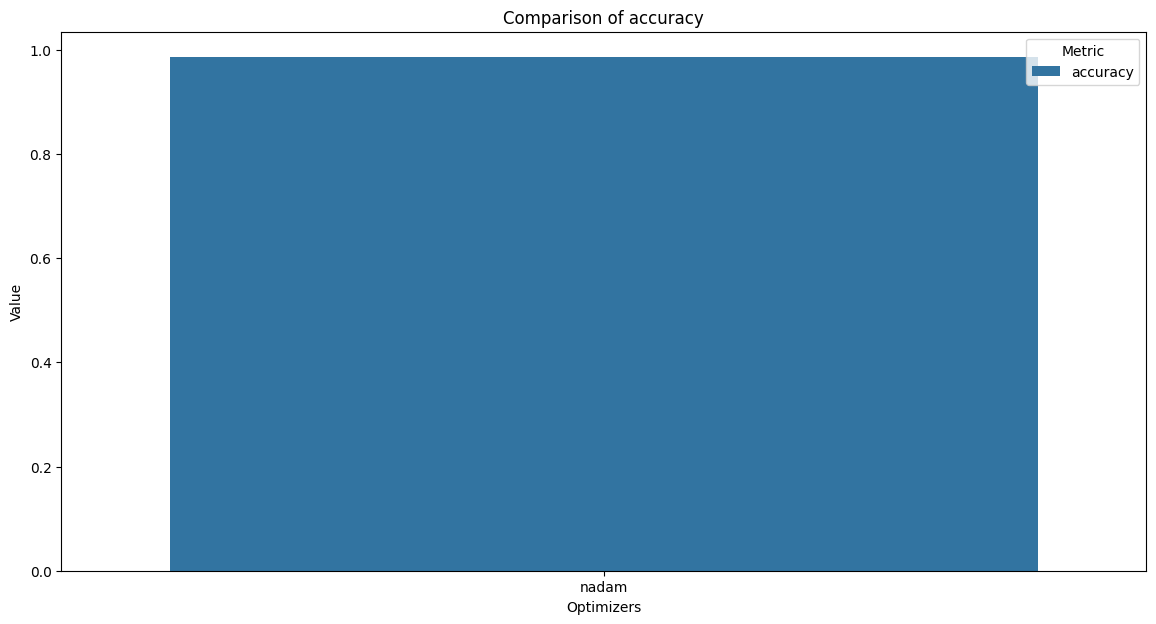

Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 64, optimizer: adam
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8544 - loss: 0.4924 - val_accuracy: 0.9750 - val_loss: 0.0899
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9765 - loss: 0.0779 - val_accuracy: 0.9795 - val_loss: 0.0681
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9869 - loss: 0.0427 - val_accuracy: 0.9839 - val_loss: 0.0501
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9906 - loss: 0.0319 - val_accuracy: 0.9876 - val_loss: 0.0401
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9930 - loss: 0.0215 - val_accuracy: 0.9858 - val_loss: 0.0477
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9877 - val_loss: 0.0416
Epoch 7/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9956 - loss: 0.0142 - val_accuracy: 0.9884 - val_loss: 0.0433


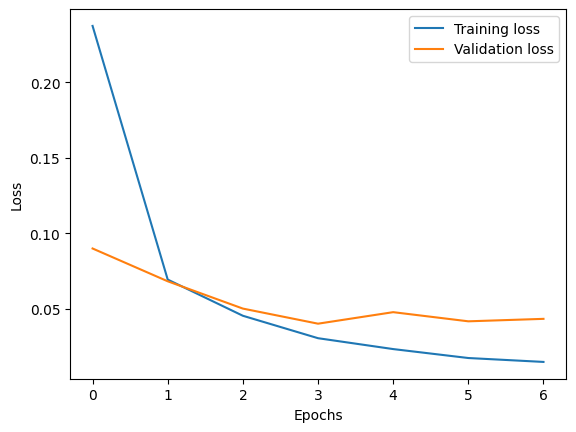

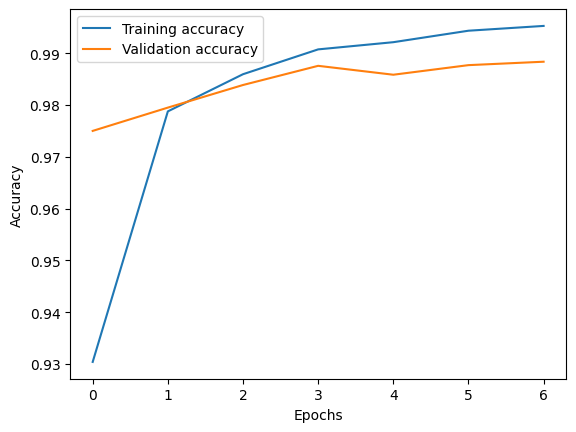

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9855 - loss: 0.0505
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


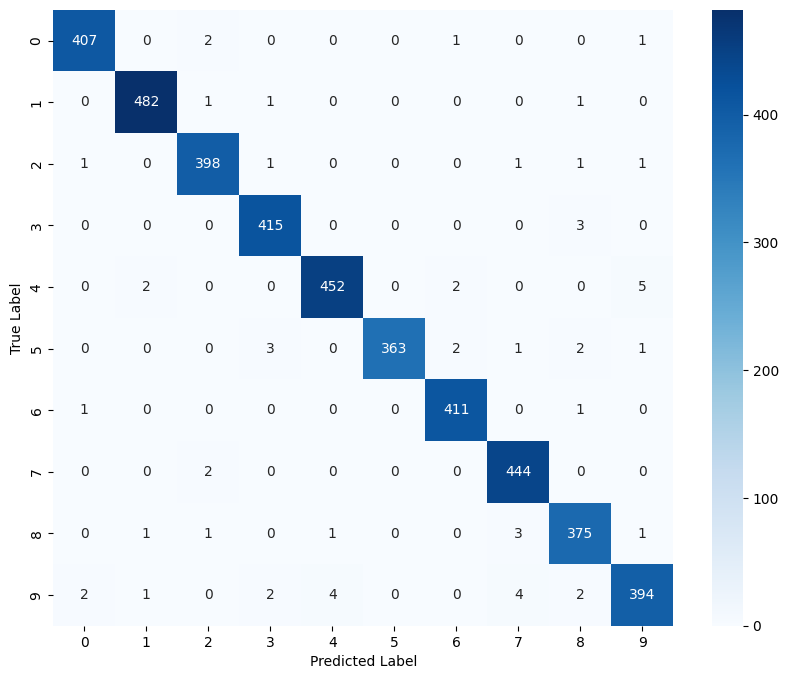

Test Accuracy: 0.9859523773193359, Precision: 0.9859916015603015, Recall: 0.9859523809523809, F1 Score: 0.9859401652329742
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 64, optimizer: sgd
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5959 - loss: 1.3965 - val_accuracy: 0.8831 - val_loss: 0.3908
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8988 - loss: 0.3394 - val_accuracy: 0.9054 - val_loss: 0.2975
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9223 - loss: 0.2605 - val_accuracy: 0.9344 - val_loss: 0.2134
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9370 - loss: 0.2119 - val_accuracy: 0.9476 - val_loss: 0.1705
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9489 - loss: 0.1729 - val_accuracy: 0.9536 - val_loss: 0.1560
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9577 - loss: 0

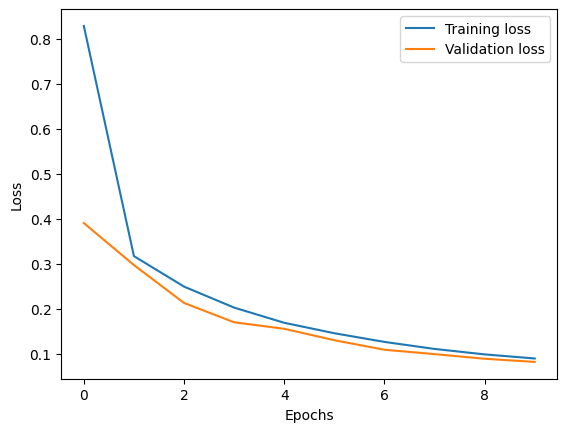

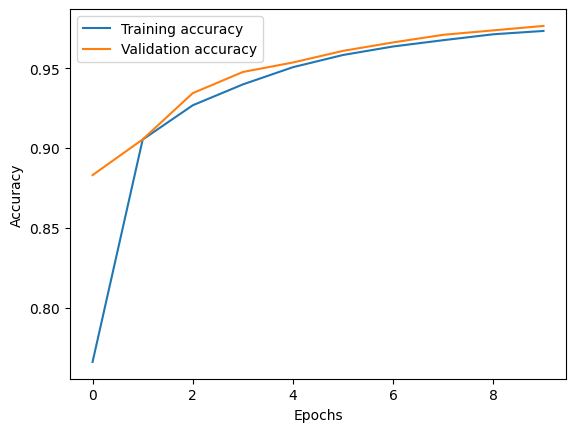

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0981
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


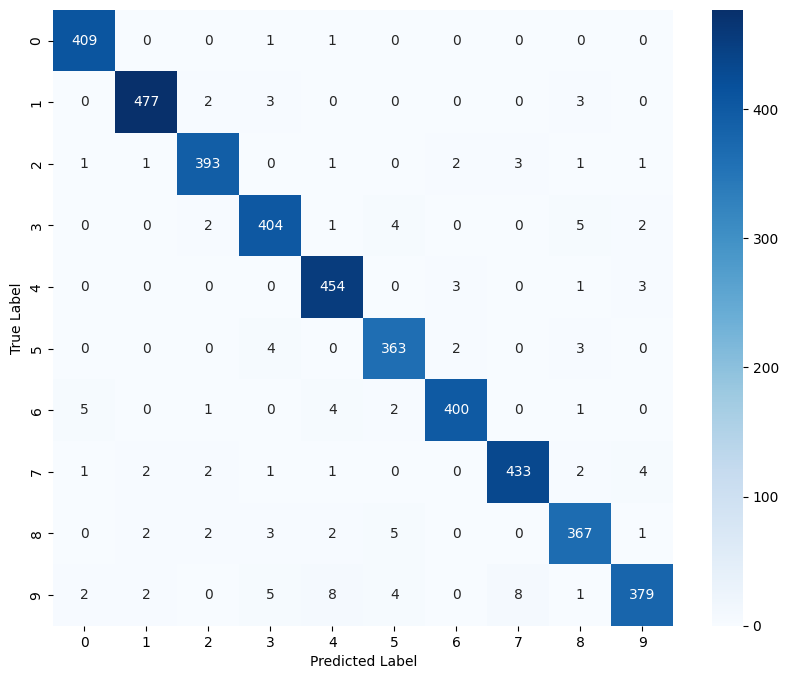

Test Accuracy: 0.9711904525756836, Precision: 0.9712601176947127, Recall: 0.9711904761904762, F1 Score: 0.9711380598995295
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 64, optimizer: rmsprop
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8450 - loss: 0.4972 - val_accuracy: 0.9767 - val_loss: 0.0771
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9768 - loss: 0.0801 - val_accuracy: 0.9825 - val_loss: 0.0609
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9855 - loss: 0.0457 - val_accuracy: 0.9851 - val_loss: 0.0516
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9904 - loss: 0.0317 - val_accuracy: 0.9864 - val_loss: 0.0548
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9926 - loss: 0.0218 - val_accuracy: 0.9877 - val_loss: 0.0425
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9946 - los

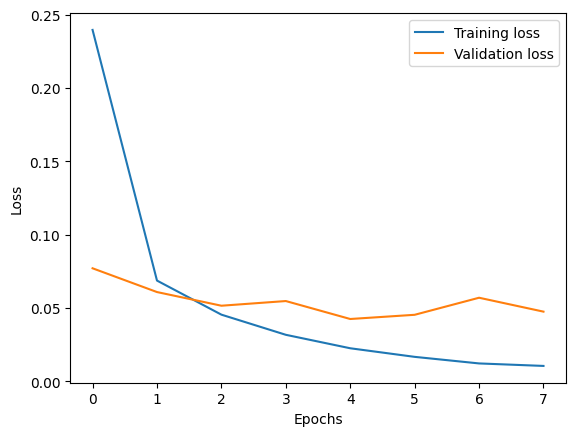

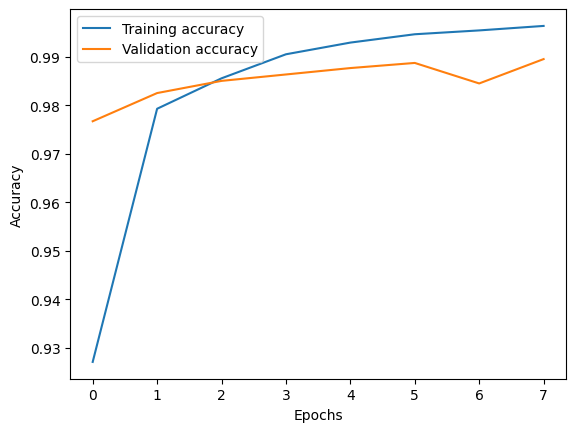

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9893 - loss: 0.0534
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


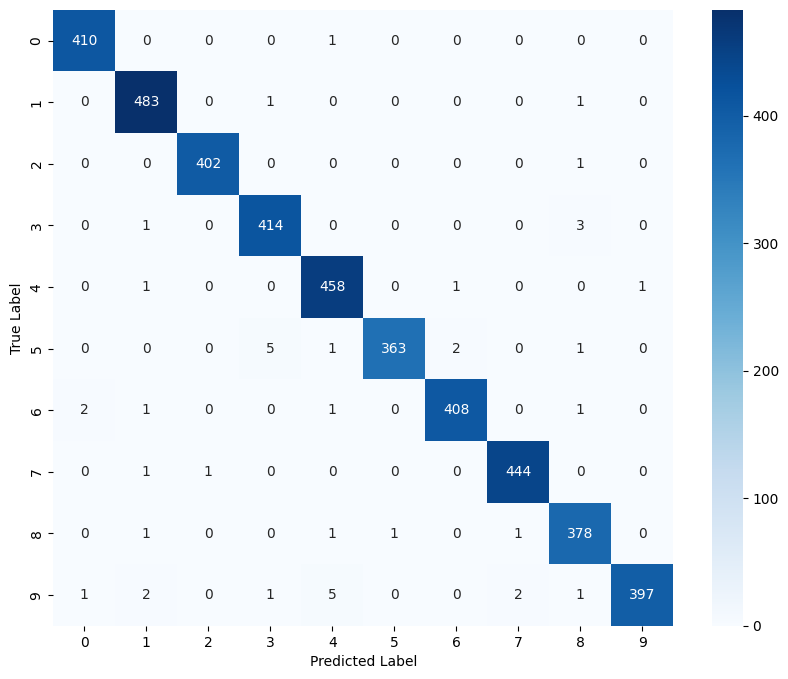

Test Accuracy: 0.9897618889808655, Precision: 0.9898278256080929, Recall: 0.9897619047619047, F1 Score: 0.9897542342620901
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 64, optimizer: adagrad
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2712 - loss: 2.2115 - val_accuracy: 0.7110 - val_loss: 1.3079
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7639 - loss: 0.9774 - val_accuracy: 0.8562 - val_loss: 0.5266
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8578 - loss: 0.4940 - val_accuracy: 0.8890 - val_loss: 0.4093
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8828 - loss: 0.4016 - val_accuracy: 0.8992 - val_loss: 0.3563
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8956 - loss: 0.3567 - val_accuracy: 0.9041 - val_loss: 0.3284
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9025 - los

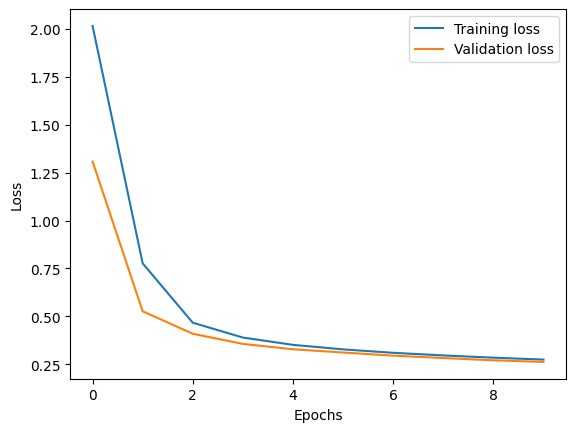

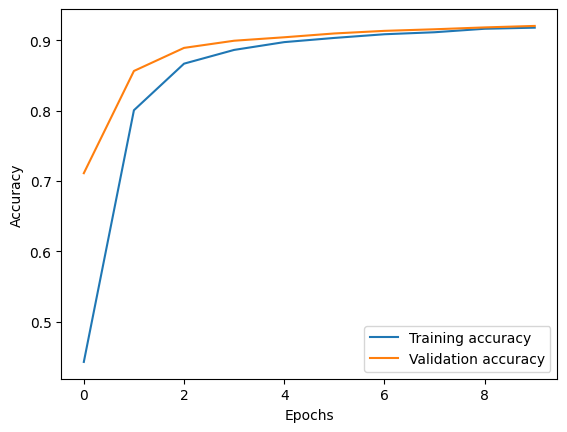

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9242 - loss: 0.2663
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


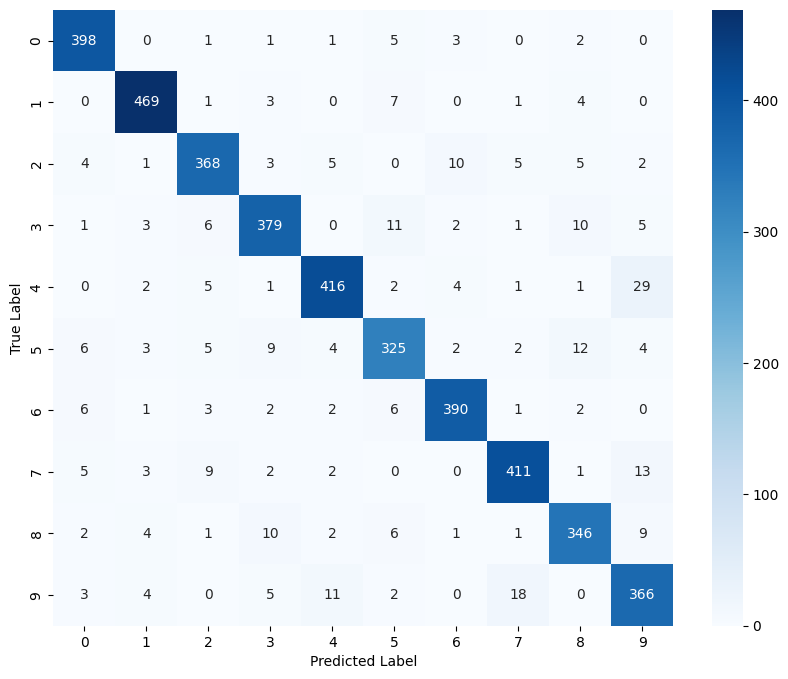

Test Accuracy: 0.9209523797035217, Precision: 0.9211985426983172, Recall: 0.920952380952381, F1 Score: 0.9209464157548112
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 64, optimizer: adadelta
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1370 - loss: 2.2942 - val_accuracy: 0.2343 - val_loss: 2.2633
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2641 - loss: 2.2539 - val_accuracy: 0.3791 - val_loss: 2.2188
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4115 - loss: 2.2067 - val_accuracy: 0.5147 - val_loss: 2.1613
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5287 - loss: 2.1454 - val_accuracy: 0.5988 - val_loss: 2.0878
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6154 - loss: 2.0685 - val_accuracy: 0.6680 - val_loss: 1.9974
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6755 - los

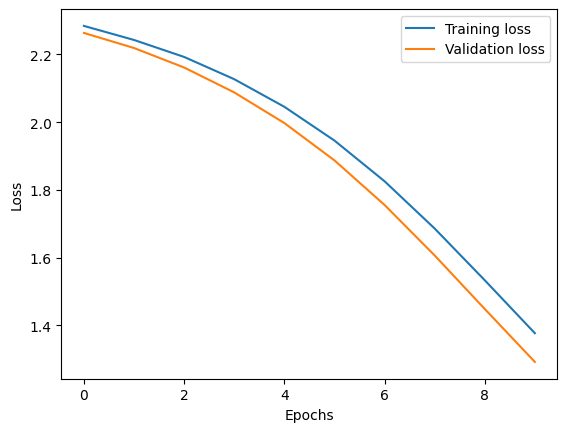

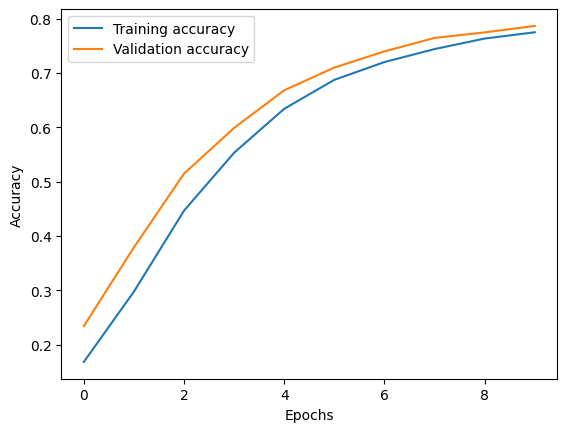

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7767 - loss: 1.3074
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


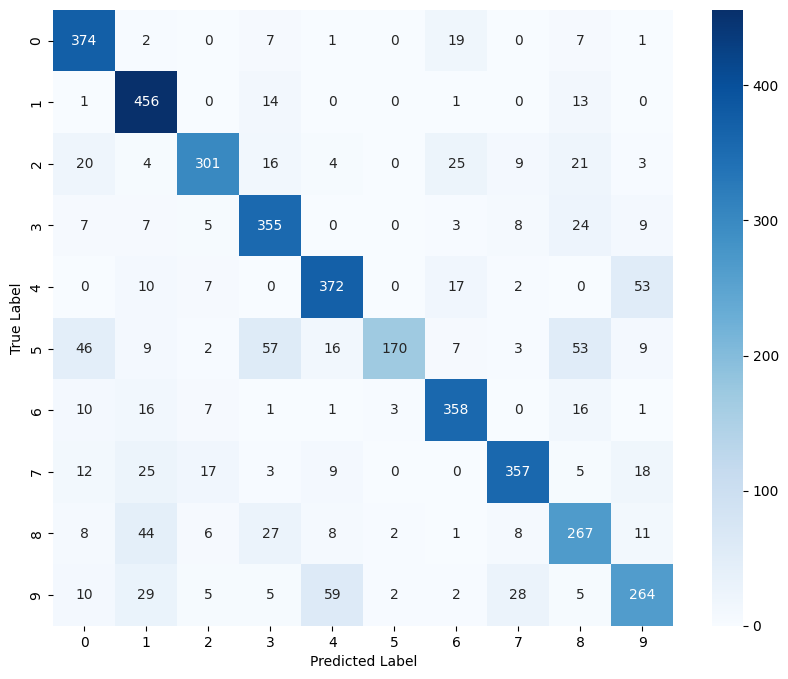

Test Accuracy: 0.7795237898826599, Precision: 0.7911849422995633, Recall: 0.7795238095238095, F1 Score: 0.7744562995639972
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 64, optimizer: adamax
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7931 - loss: 0.6820 - val_accuracy: 0.9542 - val_loss: 0.1576
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9581 - loss: 0.1386 - val_accuracy: 0.9749 - val_loss: 0.0865
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9740 - loss: 0.0869 - val_accuracy: 0.9784 - val_loss: 0.0689
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9807 - loss: 0.0643 - val_accuracy: 0.9827 - val_loss: 0.0564
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9839 - loss: 0.0534 - val_accuracy: 0.9820 - val_loss: 0.0536
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9875 - loss

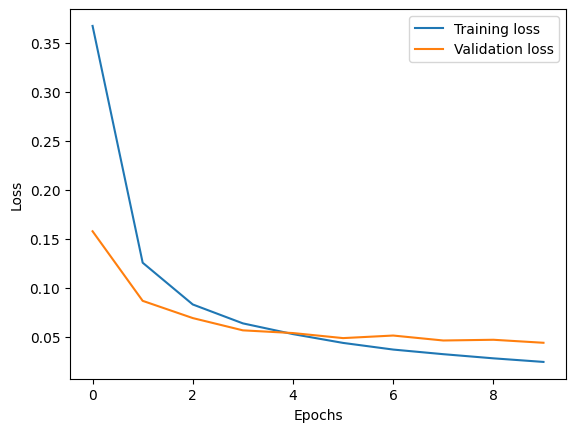

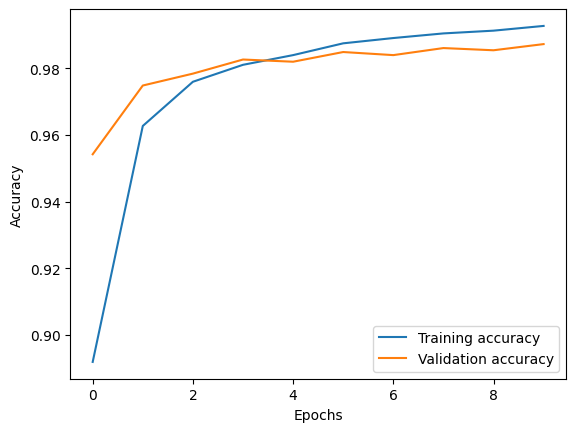

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9871 - loss: 0.0483
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


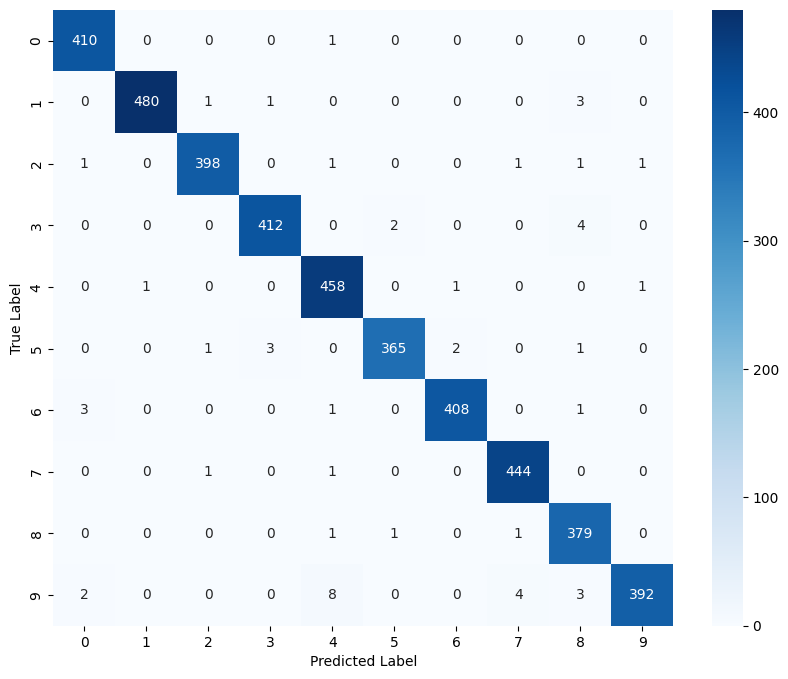

Test Accuracy: 0.9871428608894348, Precision: 0.9872779121725567, Recall: 0.9871428571428571, F1 Score: 0.9871380132713713
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 64, optimizer: nadam
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8420 - loss: 0.5078 - val_accuracy: 0.9767 - val_loss: 0.0776
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9773 - loss: 0.0751 - val_accuracy: 0.9794 - val_loss: 0.0675
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9843 - loss: 0.0515 - val_accuracy: 0.9837 - val_loss: 0.0483
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9896 - loss: 0.0335 - val_accuracy: 0.9851 - val_loss: 0.0467
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9918 - loss: 0.0255 - val_accuracy: 0.9888 - val_loss: 0.0396
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9937 - loss:

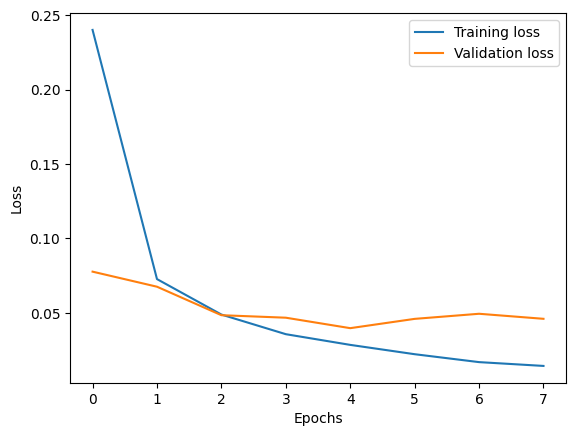

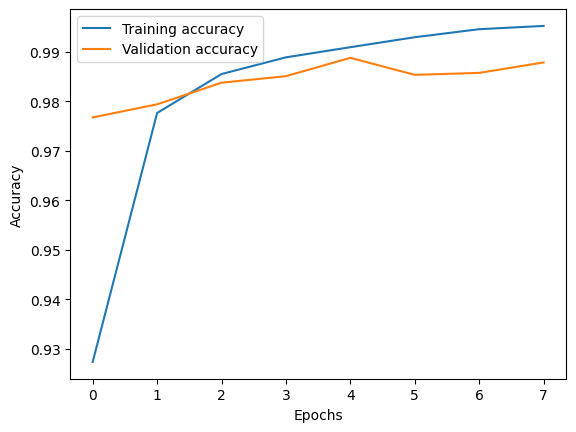

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9860 - loss: 0.0475
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


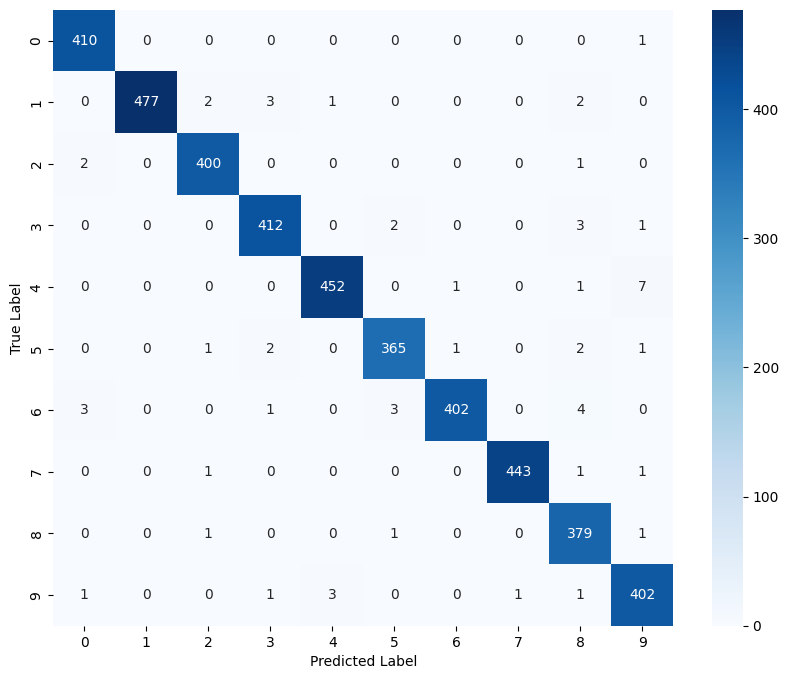

Test Accuracy: 0.9861904978752136, Precision: 0.9863348100949648, Recall: 0.9861904761904762, F1 Score: 0.9862100397040762
------------------------------------------------------------


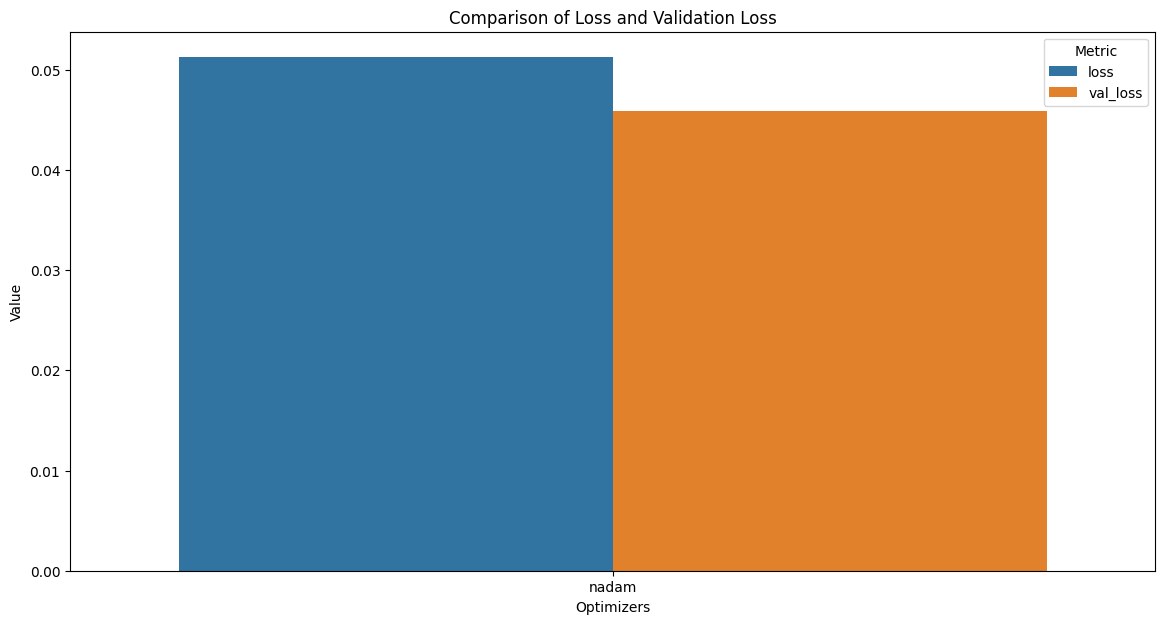

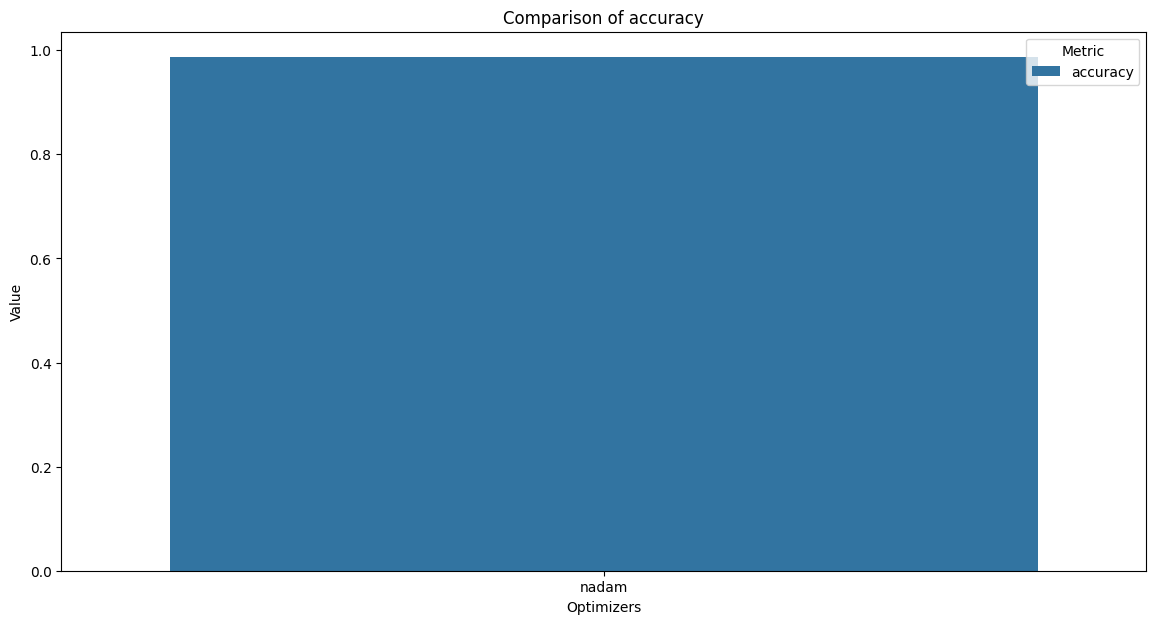

Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 128, optimizer: adam
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8557 - loss: 0.4639 - val_accuracy: 0.9733 - val_loss: 0.0856
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9812 - loss: 0.0641 - val_accuracy: 0.9828 - val_loss: 0.0554
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9889 - loss: 0.0385 - val_accuracy: 0.9872 - val_loss: 0.0436
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9915 - loss: 0.0260 - val_accuracy: 0.9869 - val_loss: 0.0436
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9893 - val_loss: 0.0406
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.9890 - val_loss: 0.0419
Epoch 7/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9963 - loss: 0.0094 - val_accuracy: 0.9861 - val_loss: 0.0467
Epoch 

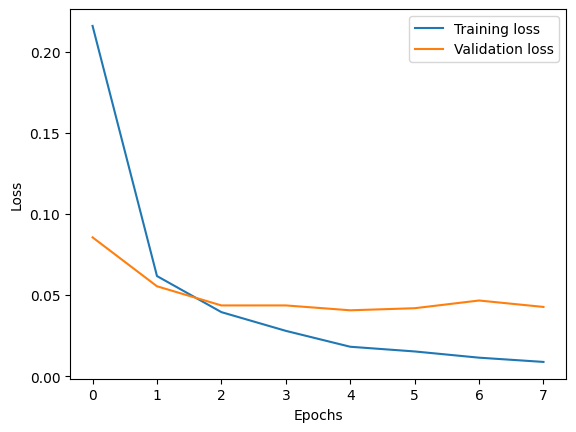

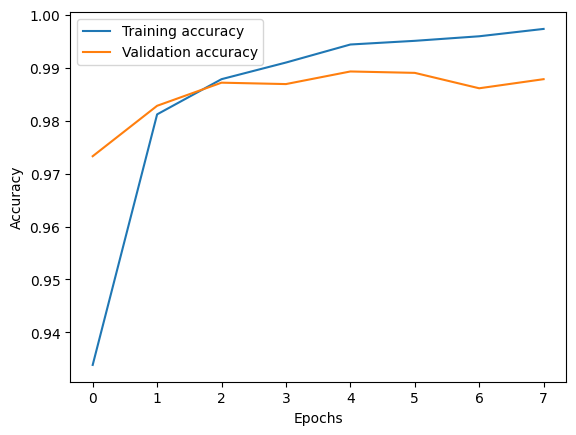

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0481
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


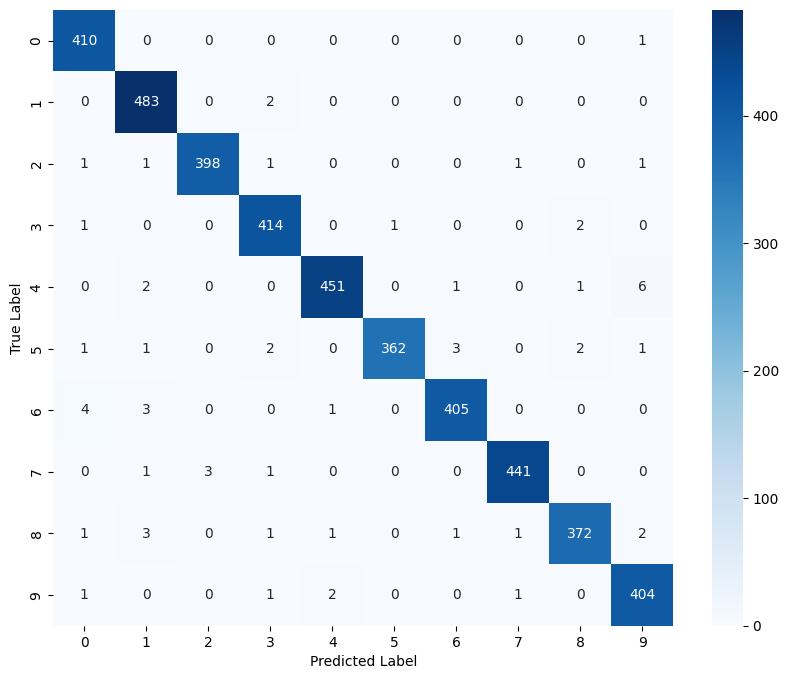

Test Accuracy: 0.9857142567634583, Precision: 0.9858090935676634, Recall: 0.9857142857142858, F1 Score: 0.9857117935907107
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 128, optimizer: sgd
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5543 - loss: 1.5464 - val_accuracy: 0.9000 - val_loss: 0.3286
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9042 - loss: 0.3214 - val_accuracy: 0.9265 - val_loss: 0.2406
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9339 - loss: 0.2302 - val_accuracy: 0.9414 - val_loss: 0.1949
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9395 - loss: 0.1980 - val_accuracy: 0.9402 - val_loss: 0.1911
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9535 - loss: 0.1618 - val_accuracy: 0.9558 - val_loss: 0.1482
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9589 - loss: 

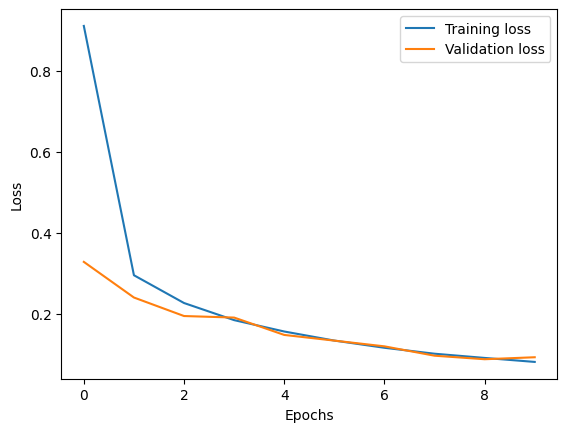

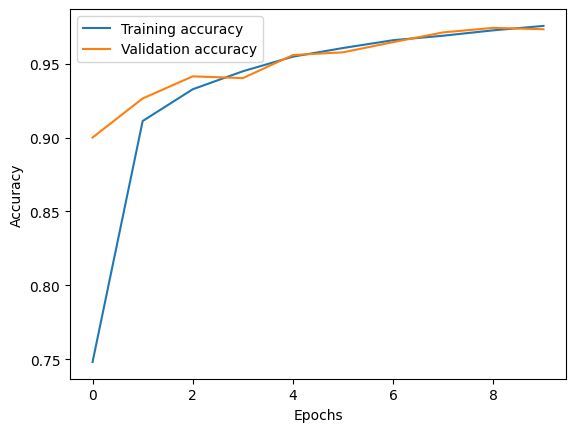

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1018
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


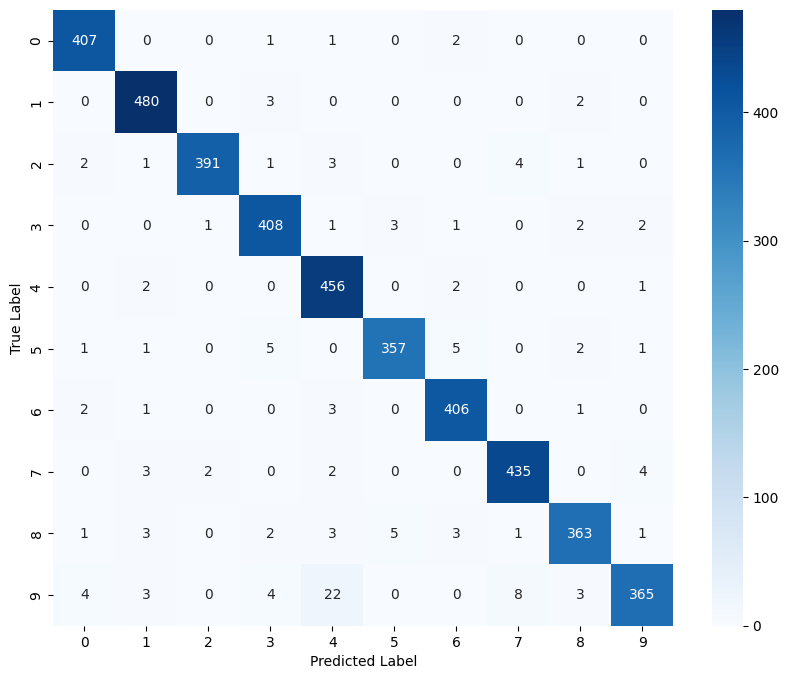

Test Accuracy: 0.9685714244842529, Precision: 0.9689782271751854, Recall: 0.9685714285714285, F1 Score: 0.9684339791401766
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 128, optimizer: rmsprop
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8667 - loss: 0.4239 - val_accuracy: 0.9755 - val_loss: 0.0700
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9800 - loss: 0.0661 - val_accuracy: 0.9780 - val_loss: 0.0669
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9877 - loss: 0.0402 - val_accuracy: 0.9870 - val_loss: 0.0448
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9913 - loss: 0.0280 - val_accuracy: 0.9878 - val_loss: 0.0431
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9948 - loss: 0.0169 - val_accuracy: 0.9899 - val_loss: 0.0407
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9959 - lo

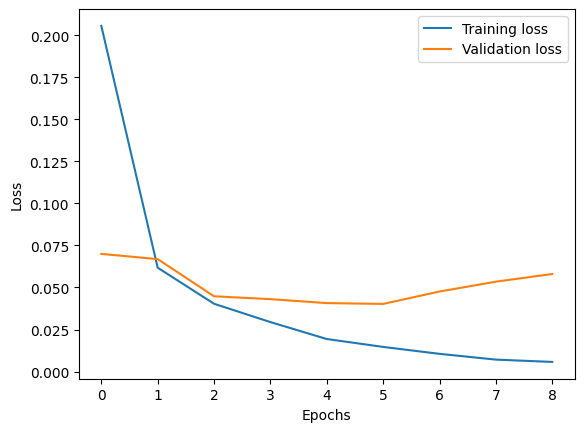

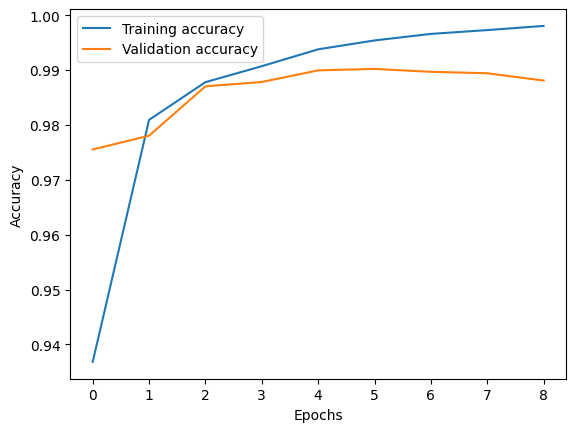

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9868 - loss: 0.0585
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


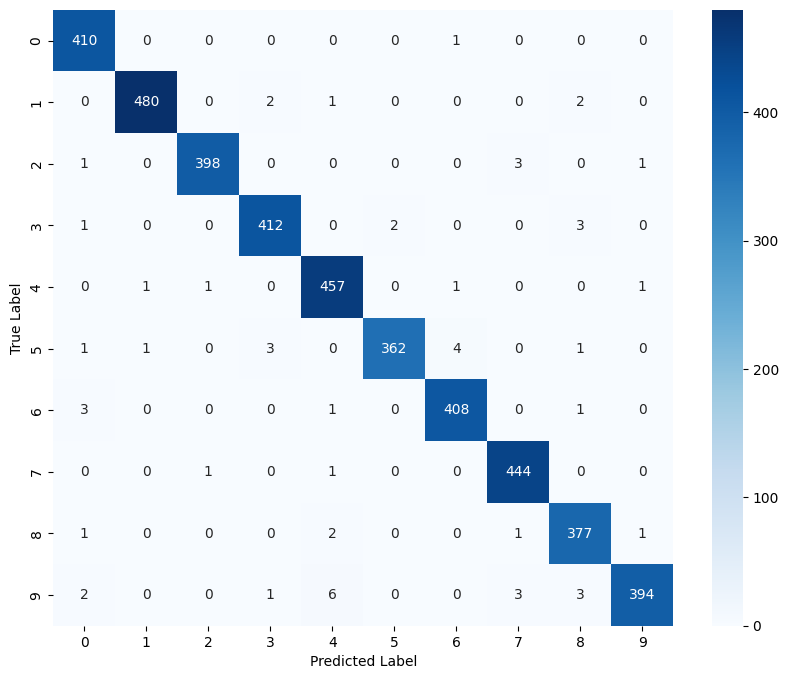

Test Accuracy: 0.9861904978752136, Precision: 0.9862846619970018, Recall: 0.9861904761904762, F1 Score: 0.9861814421945664
------------------------------------------------------------
Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 128, optimizer: adagrad
Epoch 1/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3833 - loss: 2.1530 - val_accuracy: 0.7820 - val_loss: 1.0025
Epoch 2/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8180 - loss: 0.7822 - val_accuracy: 0.8766 - val_loss: 0.4732
Epoch 3/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8758 - loss: 0.4513 - val_accuracy: 0.8943 - val_loss: 0.3809
Epoch 4/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8930 - loss: 0.3774 - val_accuracy: 0.9045 - val_loss: 0.3400
Epoch 5/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9000 - loss: 0.3424 - val_accuracy: 0.9098 - val_loss: 0.3148
Epoch 6/10
473/473 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9088 - lo

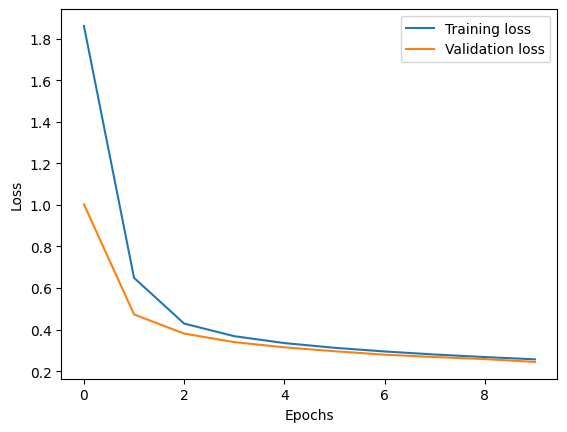

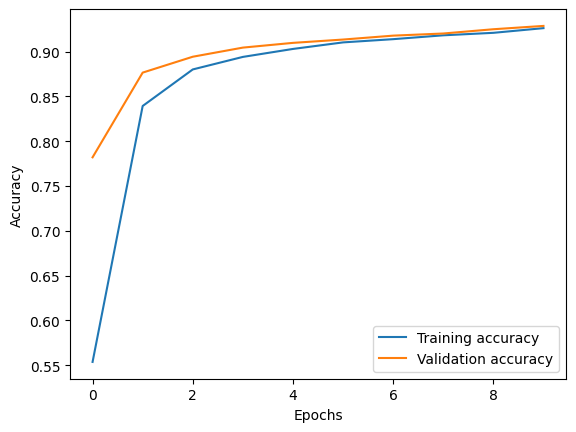

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9253 - loss: 0.2514
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
  1/132 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

KeyboardInterrupt: 

In [ ]:
# Run manual tuning
manual_hyperparameter_tuning(X_train,Y_train, X_test, Y_test, filters_list, kernel_sizes, dense_units_list, optimizers_list)

In [ ]:

from tabulate import tabulate
def summarize_results(results):
    print(tabulate(
        results,
        headers=['filters', 'kernel_size', 'dense_units', 'lr',
                  'optimizer', 'epochs', 'test_loss', 'accuracy', 'precision', 'recall', 'f1_score'],
        tablefmt="grid",
        showindex="always"
    ))

In [ ]:
summarize_results(results)

+----+-----------+------------------+---------------+-------+-------------+----------+-------------+------------+-------------+----------+------------+
|    | filters   | kernel_size      |   dense_units |    lr | optimizer   |   epochs |   test_loss |   accuracy |   precision |   recall |   f1_score |
+====+===========+==================+===============+=======+=============+==========+=============+============+=============+==========+============+
|  0 | [16, 32]  | [(3, 3), (3, 3)] |            64 | 0.001 | adam        |       10 |   0.0771277 |   0.979286 |    0.980253 | 0.979286 |   0.979388 |
+----+-----------+------------------+---------------+-------+-------------+----------+-------------+------------+-------------+----------+------------+
|  1 | [16, 32]  | [(3, 3), (3, 3)] |            64 | 0.01  | sgd         |       10 |   0.123391  |   0.96381  |    0.964211 | 0.96381  |   0.963872 |
+----+-----------+------------------+---------------+-------+-------------+----------+--

# ImageDataGenerator

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
 featurewise_center=False, # set input mean to 0 over the dataset
 samplewise_center=False, # set each sample mean to 0
 featurewise_std_normalization=False, # divide inputs by std of the dataset  samplewise_std_normalization=False, # divide each input by its std  zca_whitening=False, # dimesion reduction
 rotation_range=0.5, # randomly rotate images in the range 5 degrees  zoom_range = 0.5, # Randomly zoom image 5%
 width_shift_range=0.5, # randomly shift images horizontally 5%  height_shift_range=0.5, # randomly shift images vertically 5%  horizontal_flip=False, # randomly flip images
 vertical_flip=False) # randomly flip images

datagen.fit(X_train)

Training with filters: [16, 32], kernel_size: [(5, 5), (3, 3)], dense_units: 128, optimizer: sgd
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


945/945 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.2815 - loss: 2.0477 - val_accuracy: 0.6177 - val_loss: 1.1576
Epoch 2/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.6497 - loss: 1.0350 - val_accuracy: 0.8226 - val_loss: 0.5760
Epoch 3/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.7802 - loss: 0.6767 - val_accuracy: 0.8389 - val_loss: 0.4697
Epoch 4/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8342 - loss: 0.5118 - val_accuracy: 0.8948 - val_loss: 0.3321
Epoch 5/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8552 - loss: 0.4461 - val_accuracy: 0.9286 - val_loss: 0.2359
Epoch 6/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8784 - loss: 0.3692 - val_accuracy: 0.9287 - val_loss: 0.2363
Epoch 7/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8918 - loss: 0.3280 - val_accuracy: 0.9287 - val_loss: 0.2275
Epoch 8/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9014 - loss: 0.3035 - val_accurac

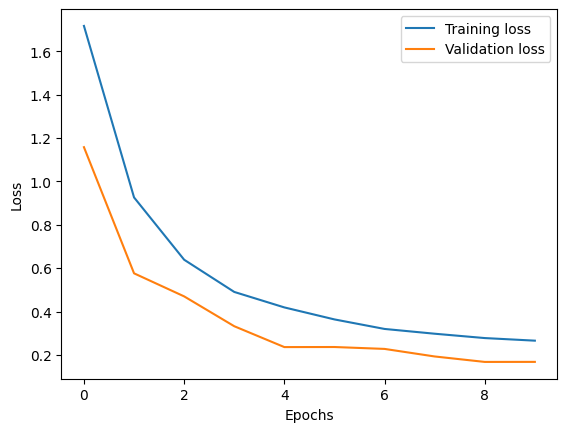

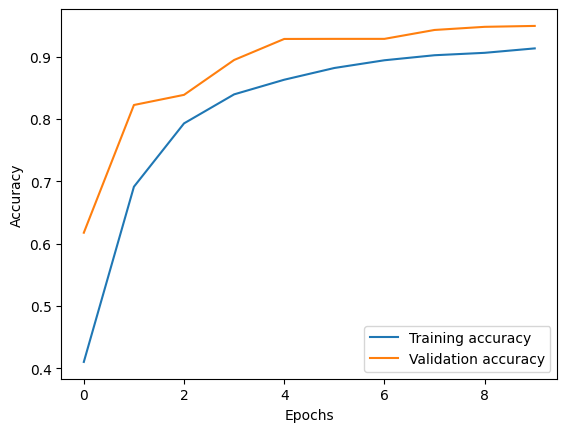

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9495 - loss: 0.1741
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


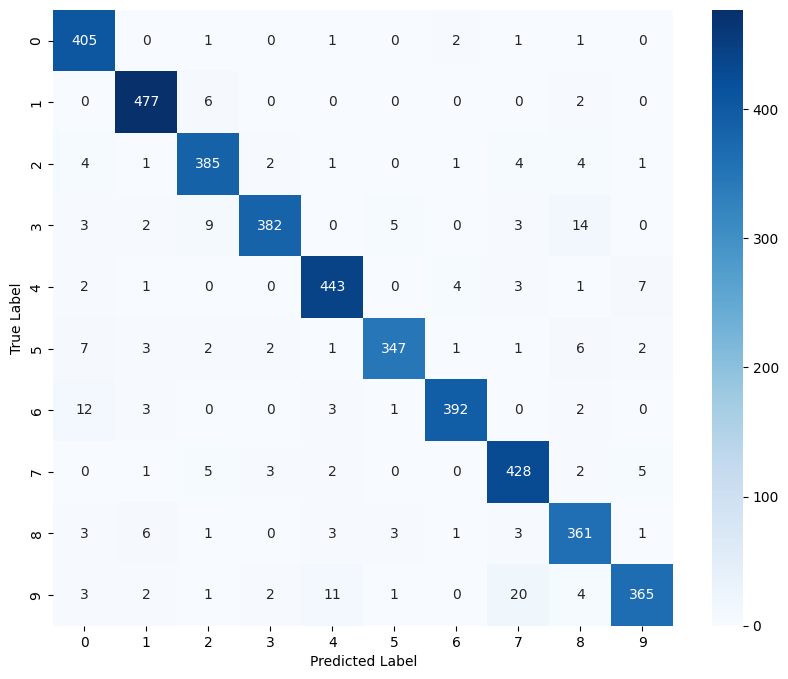

Test Accuracy: 0.9488095045089722, Precision: 0.9496105904825821, Recall: 0.9488095238095238, F1 Score: 0.9487453949829352
------------------------------------------------------------
+----+-----------+------------------+---------------+-------+-------------+----------+-------------+------------+-------------+----------+------------+
|    | filters   | kernel_size      |   dense_units |    lr | optimizer   |   epochs |   test_loss |   accuracy |   precision |   recall |   f1_score |
+====+===========+==================+===============+=======+=============+==========+=============+============+=============+==========+============+
|  0 | [16, 32]  | [(3, 3), (3, 3)] |            64 | 0.001 | adam        |       10 |   0.0771277 |   0.979286 |    0.980253 | 0.979286 |   0.979388 |
+----+-----------+------------------+---------------+-------+-------------+----------+-------------+------------+-------------+----------+------------+
|  1 | [16, 32]  | [(3, 3), (3, 3)] |            64 | 0.

In [ ]:
def training_data_augmentation(train_X, train_Y, X_test, Y_test, filters = [16, 32], kernel_size = [(5, 5), (3, 3)], dense_units = 128, optimizer = 'sgd'):
      print(f"Training with filters: {filters}, kernel_size: {kernel_size}, dense_units: {dense_units}, optimizer: {optimizer}")

      model = build_model(filters, kernel_size, [True]*(len(filters)-1) + [False], dense_units, optimizer)
      train_X, X_val, train_Y, Y_val = train_test_split(train_X, train_Y, test_size = 0.2, random_state=32)
      early_stopping_monitor = EarlyStopping(patience=3)
      datagen.fit(train_X)
      epochs=10
      history = model.fit(
          datagen.flow(train_X, train_Y),
          validation_data=(X_val,Y_val),
          epochs=epochs, batch_size=64,
          callbacks=[early_stopping_monitor]
      )

      plot_visualization(history)
      test_loss, test_accuracy = model.evaluate(X_test, Y_test)
      precision, recall, f1 = calculate_metrics(model, X_test, Y_test)
      confusion_matrix_visualization(model, X_test, Y_test)

      results.append([filters, kernel_size, dense_units, float(model.optimizer.learning_rate.numpy()), optimizer, epochs,
                      test_loss, test_accuracy, precision, recall, f1])
      print(f"Test Accuracy: {test_accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")
      print("-" * 60)
training_data_augmentation(X_train,Y_train, X_test, Y_test)
summarize_results(results)

In [ ]:
'''#history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),  epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

history = model.fit(
    datagen.flow(X_train,Y_train, batch_size=batch_size),
    validation_data=(X_val,Y_val),
    epochs=epochs,
    #steps_per_epoch=X_train.shape[0] // batch_size,
    callbacks=[early_stopping], verbose=0)
model.summary()
plot_visualization(history)
confusion_matrix_visualization(model)'''

# LeNet-5 CNN

## CNN Architecture

We will LeNet-5 CNN architeture to build our model.

### Input : Flattened 784px grayscale images, which can be represented as dimension (n, 28, 28, 1)
### Output: 0 - 9

### Let's decode the operations we will be performing in each layer
** First Layer:  Convolutional Layer (CONV1): **
* Parameters: Input (N) = 28, Padding (P) = 2, Filter (F) = 5 x 5, Stride (S) = 1
* Conv Operation: ((N + 2P - F) / S) + 1 = ((28 + 4 - 5) / 1) + 1 = 28 x 28
* We will apply 6 filters / kernels so we will get a 28 x 28 x 6 dimensional output

** Second Layer:  Average Pooling Layer (POOL1): **
* Parameters: Input (N) = 28, Filter (F) = 2 x 2, Stride (S) = 2
* AVG Pooling Operation: ((N + 2P -F) / S) + 1 = ((28 - 2) / 2) + 1 = 14 x 14
* We will have a 14 x 14 x 6 dimensional output at the end of this pooling

** Third Layer:  Convolutional Layer (CONV2): **
* Parameters: Input (N) = 14, Filter (F) = 5 x 5, Stride (S) = 1
* Conv Operation: ((N + 2P - F) / S) + 1 = ((14 - 5) / 1) + 1 = 10 x 10
* We will apply 16 filters / kernels so we will get a 10 x 10 x 16 dimensional output

** Fourth Layer: Average Pooling Layer (POOL2): **
* Parameters: Input (N) = 10, Filter (F) = 2 x 2, Stride (S) = 2
* AVG Pooling Operation: ((N + 2P -F) / S) + 1 = ((10 - 2) / 2) + 1 = 5 x 5
* We will have a 5 x 5 x 16 dimensional output at the end of this pooling

** Fifth Layer: Fully Connected layer(FC1): **
* Parameters: W: 400 * 120, b: 120
* We will have an output of 120 x 1 dimension

** Sixth Layer: Fully Connected layer(FC2): **
* Parameters: W: 120 * 84, b: 84
* We will have an output of 84 x 1 dimension

** Seventh Layer: Output layer(Softmax): **
* Parameters: W: 84 * 10, b: 10
* We will get an output of 10 x 1 dimension

We will tweak the pooling layers from average to max and activation functions. With this architecture as per book, I was not able to achieve accuracy > 98.5%. Let's imcrease the filters and check.

In [ ]:
def training_LeNet_CNN(model,train_X, train_Y, X_test, Y_test):
      print(f"Training LeNet-5 CNN")

      train_X, X_val, train_Y, Y_val = train_test_split(train_X, train_Y, test_size = 0.2, random_state=32)
      early_stopping_monitor = EarlyStopping(patience=3)
      model.build()
      model.summary()
      optimizer = Adam(0.001, beta_1=0.9, beta_2=0.999)
      model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
      # Set a learning rate annealer
      reduce_lr = ReduceLROnPlateau(monitor='val_acc',
                                patience=3,
                                verbose=1,
                                factor=0.2,
                                min_lr=1e-6)
      datagen.fit(train_X)

      history = model.fit(
          datagen.flow(train_X, train_Y),
          validation_data=(X_val,Y_val),
          epochs=10, batch_size=64,
          callbacks=[reduce_lr]
      )

      plot_visualization(history)
      test_loss, test_accuracy = model.evaluate(X_test, Y_test)
      precision, recall, f1 = calculate_metrics(model, X_test, Y_test)
      confusion_matrix_visualization(model, X_test, Y_test)

      print(f"Test Accuracy: {test_accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")
      print("-" * 60)

In [ ]:
modelLeNet = Sequential()
modelLeNet.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
modelLeNet.add(MaxPool2D(strides=2))
modelLeNet.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
modelLeNet.add(MaxPool2D(strides=2))
modelLeNet.add(Flatten())
modelLeNet.add(Dense(256, activation='relu'))
modelLeNet.add(Dense(84, activation='relu'))
modelLeNet.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1)


Training LeNet-5 CNN


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)                   │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 10, 10, 48)          │          38,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 5, 5, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_31 (Flatten)                 │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 256)                 │         307,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 84)                  │          21,588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369,174 (1.41 MB)

 Trainable params: 369,174 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


945/945 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.7876 - loss: 0.6315 - val_accuracy: 0.9791 - val_loss: 0.0673 - learning_rate: 0.0010
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


945/945 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9648 - loss: 0.1136 - val_accuracy: 0.9886 - val_loss: 0.0361 - learning_rate: 0.0010
Epoch 3/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9776 - loss: 0.0761 - val_accuracy: 0.9860 - val_loss: 0.0411 - learning_rate: 0.0010
Epoch 4/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9804 - loss: 0.0603 - val_accuracy: 0.9701 - val_loss: 0.1010 - learning_rate: 0.0010
Epoch 5/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9808 - loss: 0.0604 - val_accuracy: 0.9796 - val_loss: 0.0628 - learning_rate: 0.0010
Epoch 6/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.9832 - loss: 0.0516 - val_accuracy: 0.9899 - val_loss: 0.0345 - learning_rate: 0.0010
Epoch 7/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9857 - loss: 0.0456 - val_accuracy: 0.9865 - val_loss: 0.0428 - learning_rate: 0.0010
Epoch 8/10
945/945 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9876 - loss: 0.0436

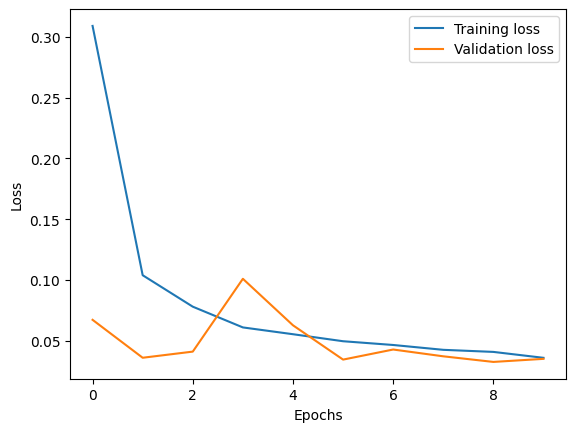

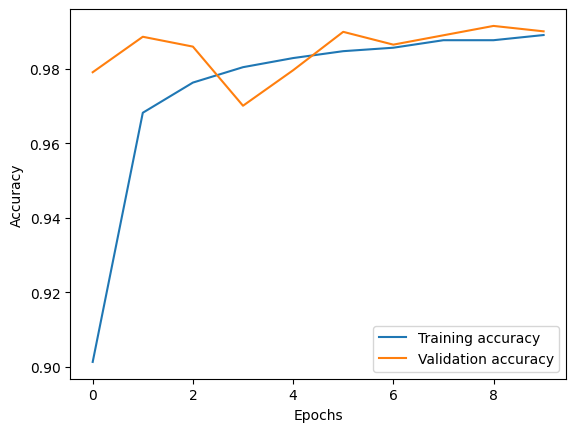

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9923 - loss: 0.0294
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


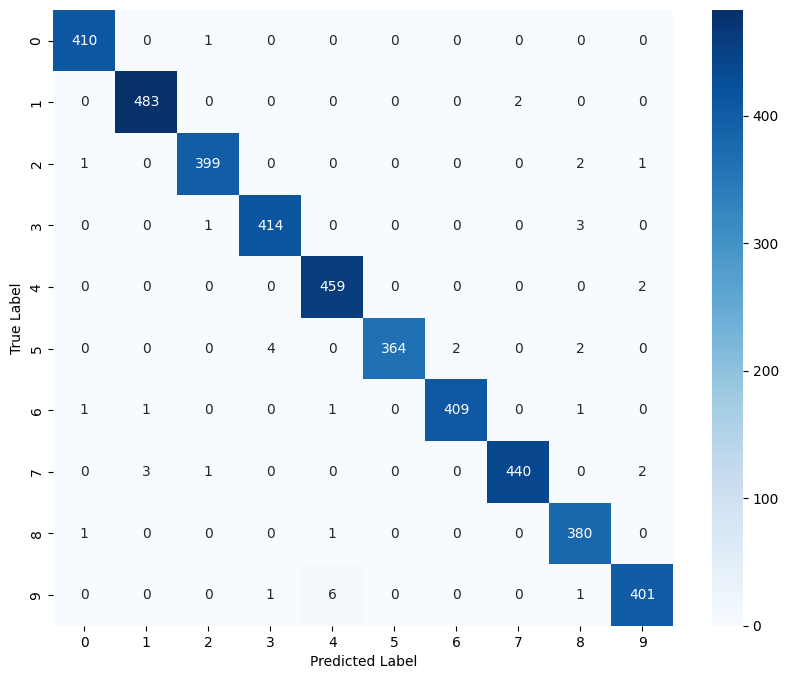

Test Accuracy: 0.9902380704879761, Precision: 0.9902941393262896, Recall: 0.9902380952380953, F1 Score: 0.9902384795831304
------------------------------------------------------------


In [ ]:
training_LeNet_CNN(modelLeNet,X_train,Y_train, X_test, Y_test)

In [ ]:
score = modelLeNet.evaluate(X_test, Y_test, batch_size=32)
score

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9923 - loss: 0.0294


[0.03632725775241852, 0.9902380704879761]

In [ ]:
summarize_results(results)

+----+-----------+------------------+---------------+-------+-------------+----------+-------------+------------+-------------+----------+------------+
|    | filters   | kernel_size      |   dense_units |    lr | optimizer   |   epochs |   test_loss |   accuracy |   precision |   recall |   f1_score |
+====+===========+==================+===============+=======+=============+==========+=============+============+=============+==========+============+
|  0 | [16, 32]  | [(3, 3), (3, 3)] |            64 | 0.001 | adam        |       10 |   0.0771277 |   0.979286 |    0.980253 | 0.979286 |   0.979388 |
+----+-----------+------------------+---------------+-------+-------------+----------+-------------+------------+-------------+----------+------------+
|  1 | [16, 32]  | [(3, 3), (3, 3)] |            64 | 0.01  | sgd         |       10 |   0.123391  |   0.96381  |    0.964211 | 0.96381  |   0.963872 |
+----+-----------+------------------+---------------+-------+-------------+----------+--

# Let's predict test data

In [ ]:

Y_test_predict = model.predict(X_orig_test)
Y_test = np.argmax(Y_test_predict, axis=1)
Y_test[:5]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'my_conv_layer_17', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


875/875 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step


array([5, 9, 9, 6, 5])

# Fit the model



## Compile Model

- optimizer - Adam
- loss - categorical cross entropy
- metrics - accuracy

![picture](https://gombru.github.io/assets/cross_entropy_loss/softmax_CE_pipeline.png)

## Test the model
We will now test the model on some random test data set. We will first construct the image of the number from the test data and then run our classifier to verify if it could identify it correctly.


875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step
2


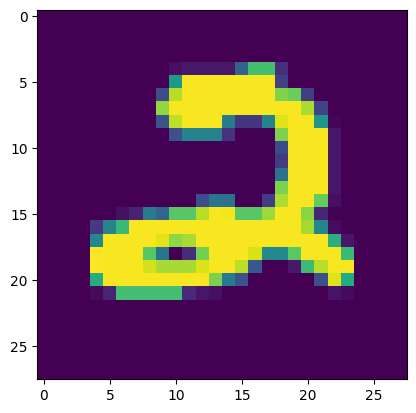

In [ ]:
Y_pred_test = model.predict(X_orig_test)
Y_pred_classes_test = np.argmax(Y_pred_test,axis = 1)

image = X_orig_test[0].reshape( 28, 28)
plt.imshow(image)
print(Y_pred_classes_test[0])
#Y_true_test = np.argmax(y_orig_test,axis = 1)
#print(y_orig_test[0])


3


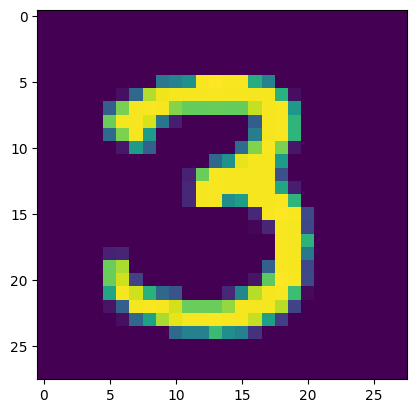

In [ ]:
i = 120
image = X_orig_test[i].reshape( 28, 28)
plt.imshow(image)
print(Y_pred_classes_test[i])
#print(y_orig_test[i])

In [ ]:
### Printing classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(Y_true_test, Y_pred_classes_test, target_names=target_names))

In [ ]:
##Accuracy Score
from sklearn.metrics import accuracy_score
print("Accuracy on test sample is: %f" %(accuracy_score(Y_true_test, Y_pred_classes_test)))

# Experement

In [ ]:
# Define the custom convolutional layer
class MyConvLayer(tf.keras.layers.Layer):
    def __init__(self, filters: int, kernel_size: tuple, use_max_pool: bool = True):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='Same', activation='relu')
        self.batch_norm = tf.keras.layers.BatchNormalization()  # Adding Batch Normalization
        self.max_pool = tf.keras.layers.MaxPool2D((2, 2)) if use_max_pool else None
        self.avg_pool = tf.keras.layers.AveragePooling2D((2, 2)) if not use_max_pool else None  # Adding Average Pooling

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.batch_norm(x, training=training)  # Apply Batch Normalization

        if self.max_pool:
            x = self.max_pool(x)  # Max Pooling
        elif self.avg_pool:
            x = self.avg_pool(x)  # Average Pooling

        return x

# Define the CNN model class with hyperparameter options
class ModelWithTuning(tf.keras.Model):
    def __init__(self, filters, kernel_size, use_max_pool, dense_units, dropout_rate=0.5):
        super(ModelWithTuning, self).__init__()
        self.my_layers = tf.keras.models.Sequential([
            MyConvLayer(filters=f, kernel_size=ks, use_max_pool=ump)
            for f, ks, ump in zip(filters, kernel_size, use_max_pool)
        ])
        self.flatten = Flatten()
        self.fc1 = Dense(dense_units, activation='relu')
        self.batch_norm_fc1 = tf.keras.layers.BatchNormalization()  # Batch Normalization for the Dense layer
        self.dropout = tf.keras.layers.Dropout(dropout_rate)  # Adding Dropout
        self.fc2 = Dense(10, activation='softmax')

    def call(self, inputs, training=False):
        x = self.my_layers(inputs, training=training)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.batch_norm_fc1(x, training=training)  # Apply Batch Normalization after first dense layer
        x = self.dropout(x, training=training)  # Apply Dropout
        return self.fc2(x)
